In [1]:
#load library
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import scale

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import matthews_corrcoef

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Proj1ReorderedRound.csv')
X = data.drop(['Condition'], axis = 1)
Y = data['Condition']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

YClass = ['Condition3','Condtion4','Normal1']    #default target names. only useful in visualisation

In [3]:
#initialize kfold split function here

k = 4

cv = sk(n_splits=k, shuffle=True, random_state=0)



Fold Group  1



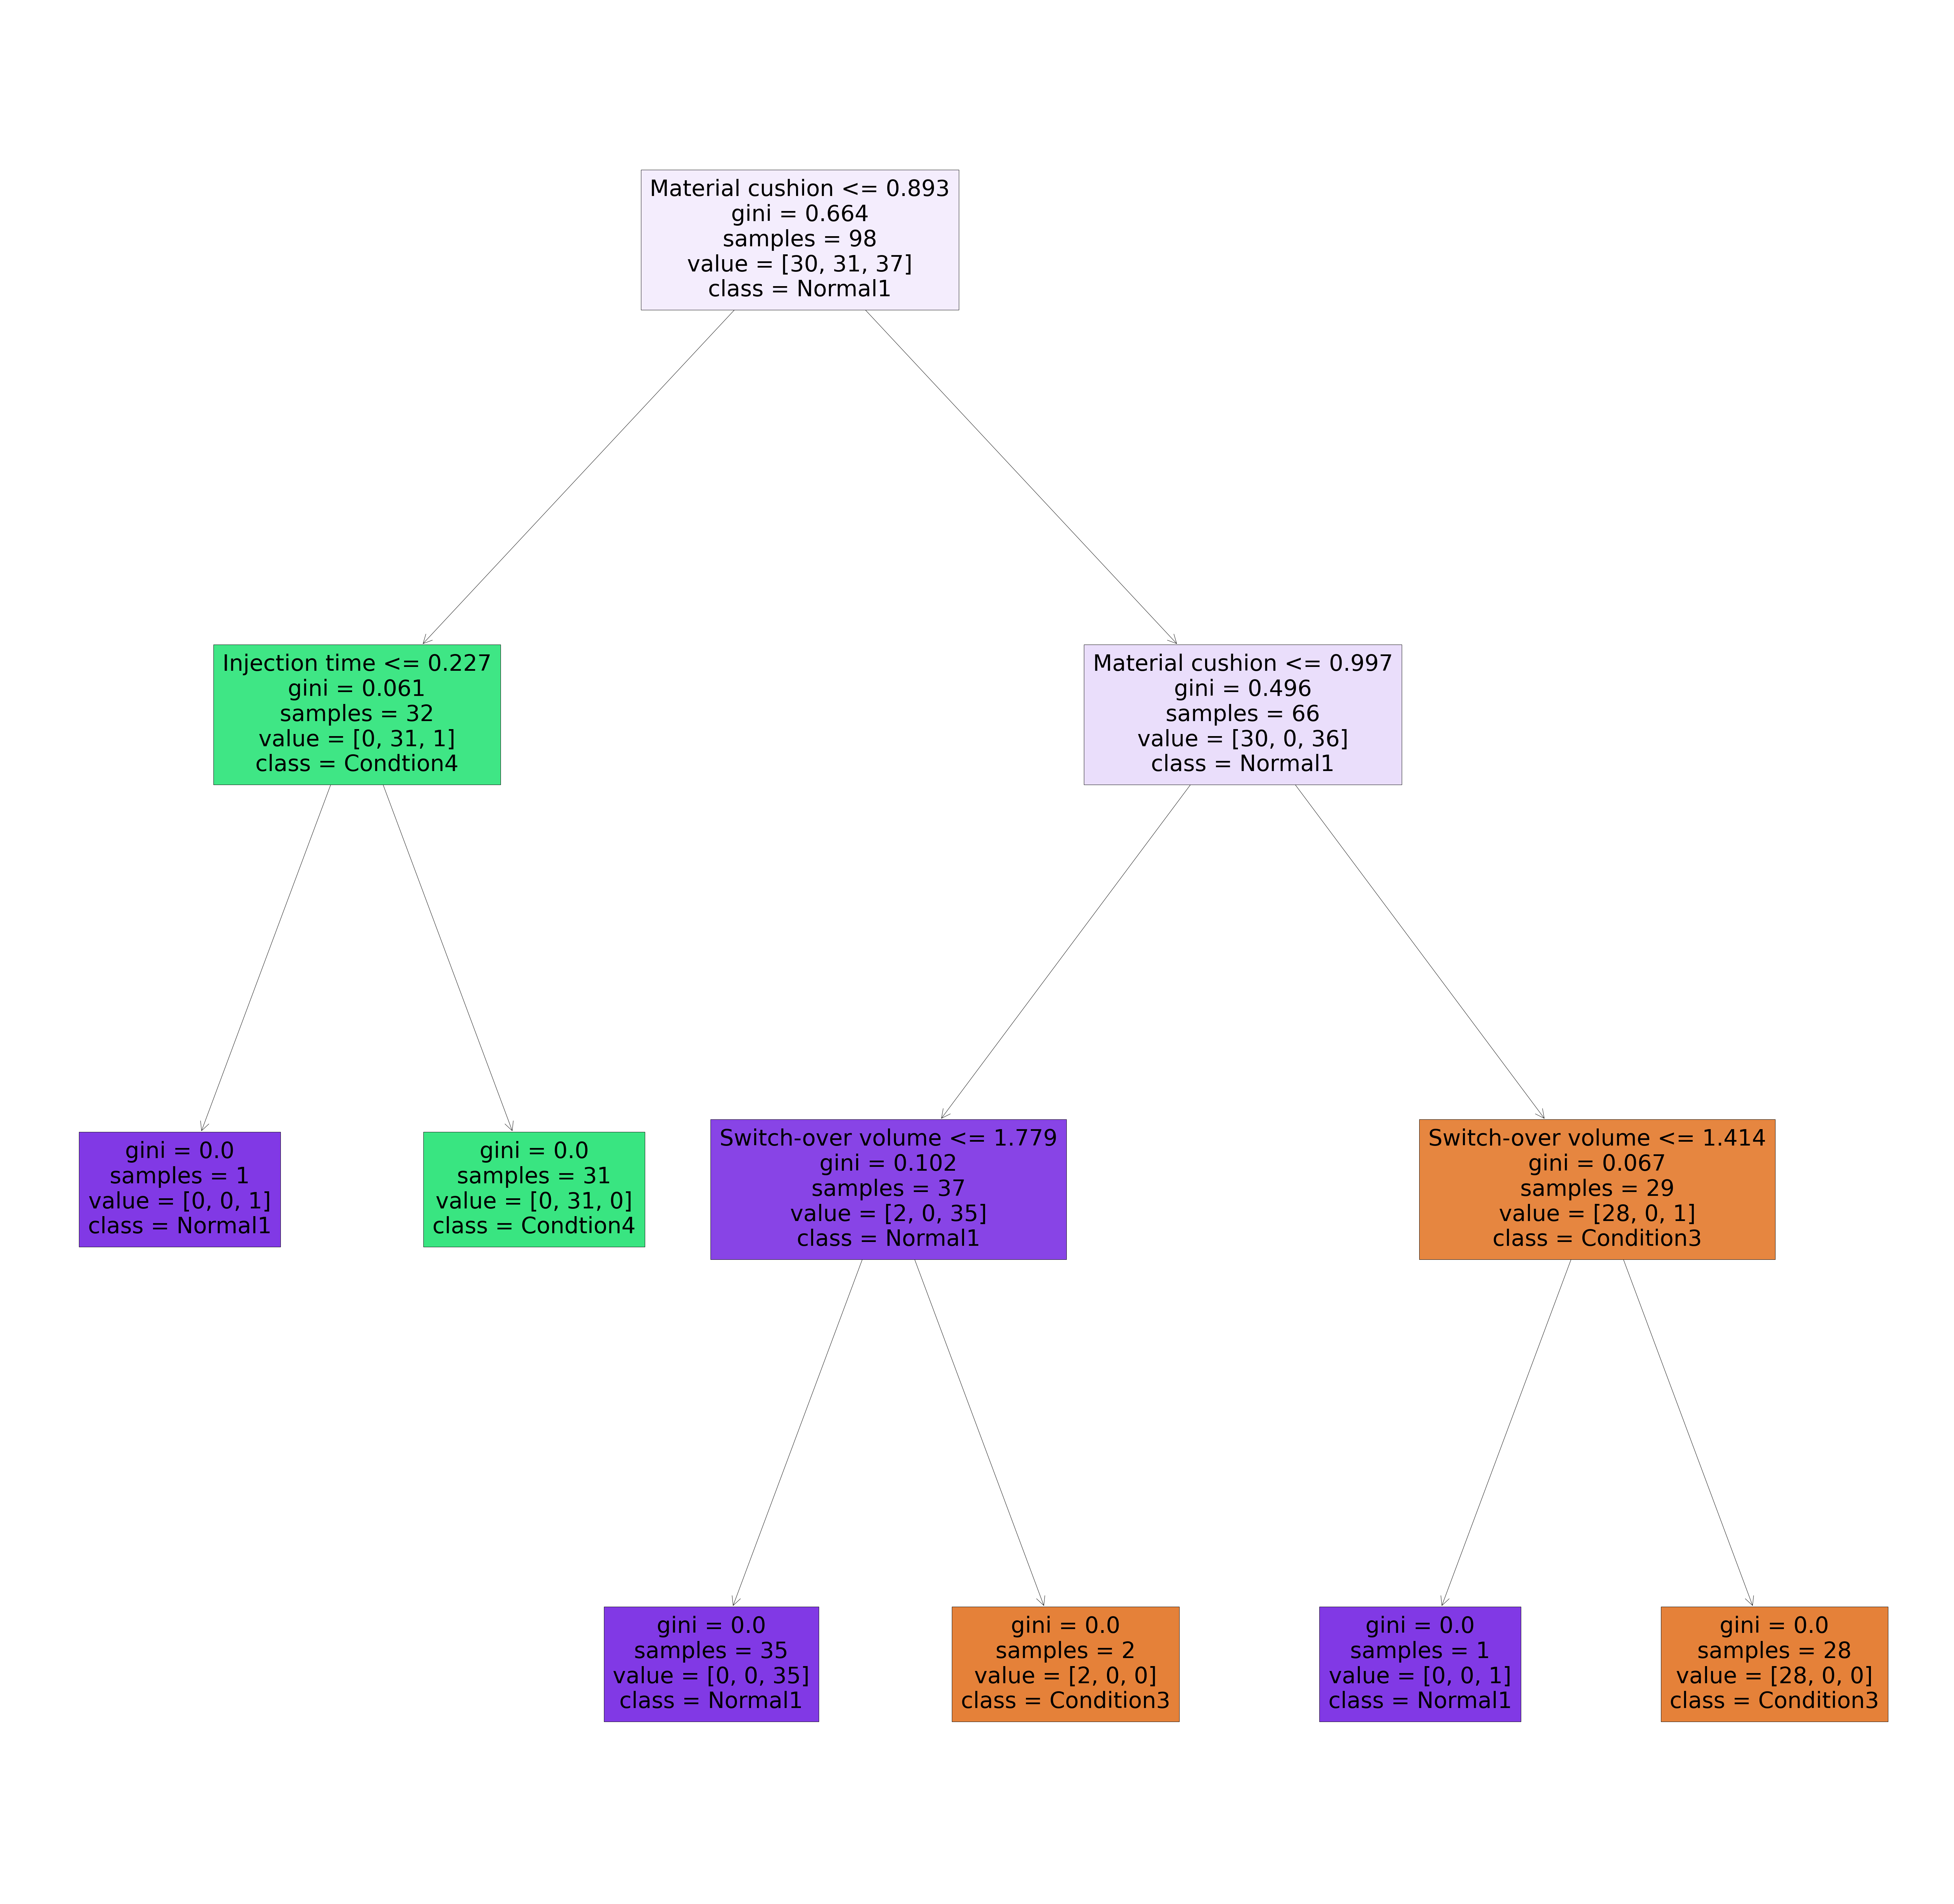

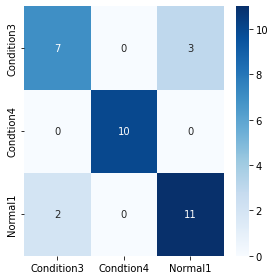

              precision    recall  f1-score   support

  Condition3       0.78      0.70      0.74        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.79      0.85      0.81        13

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33

Tree Depth = 3


Fold Group  2



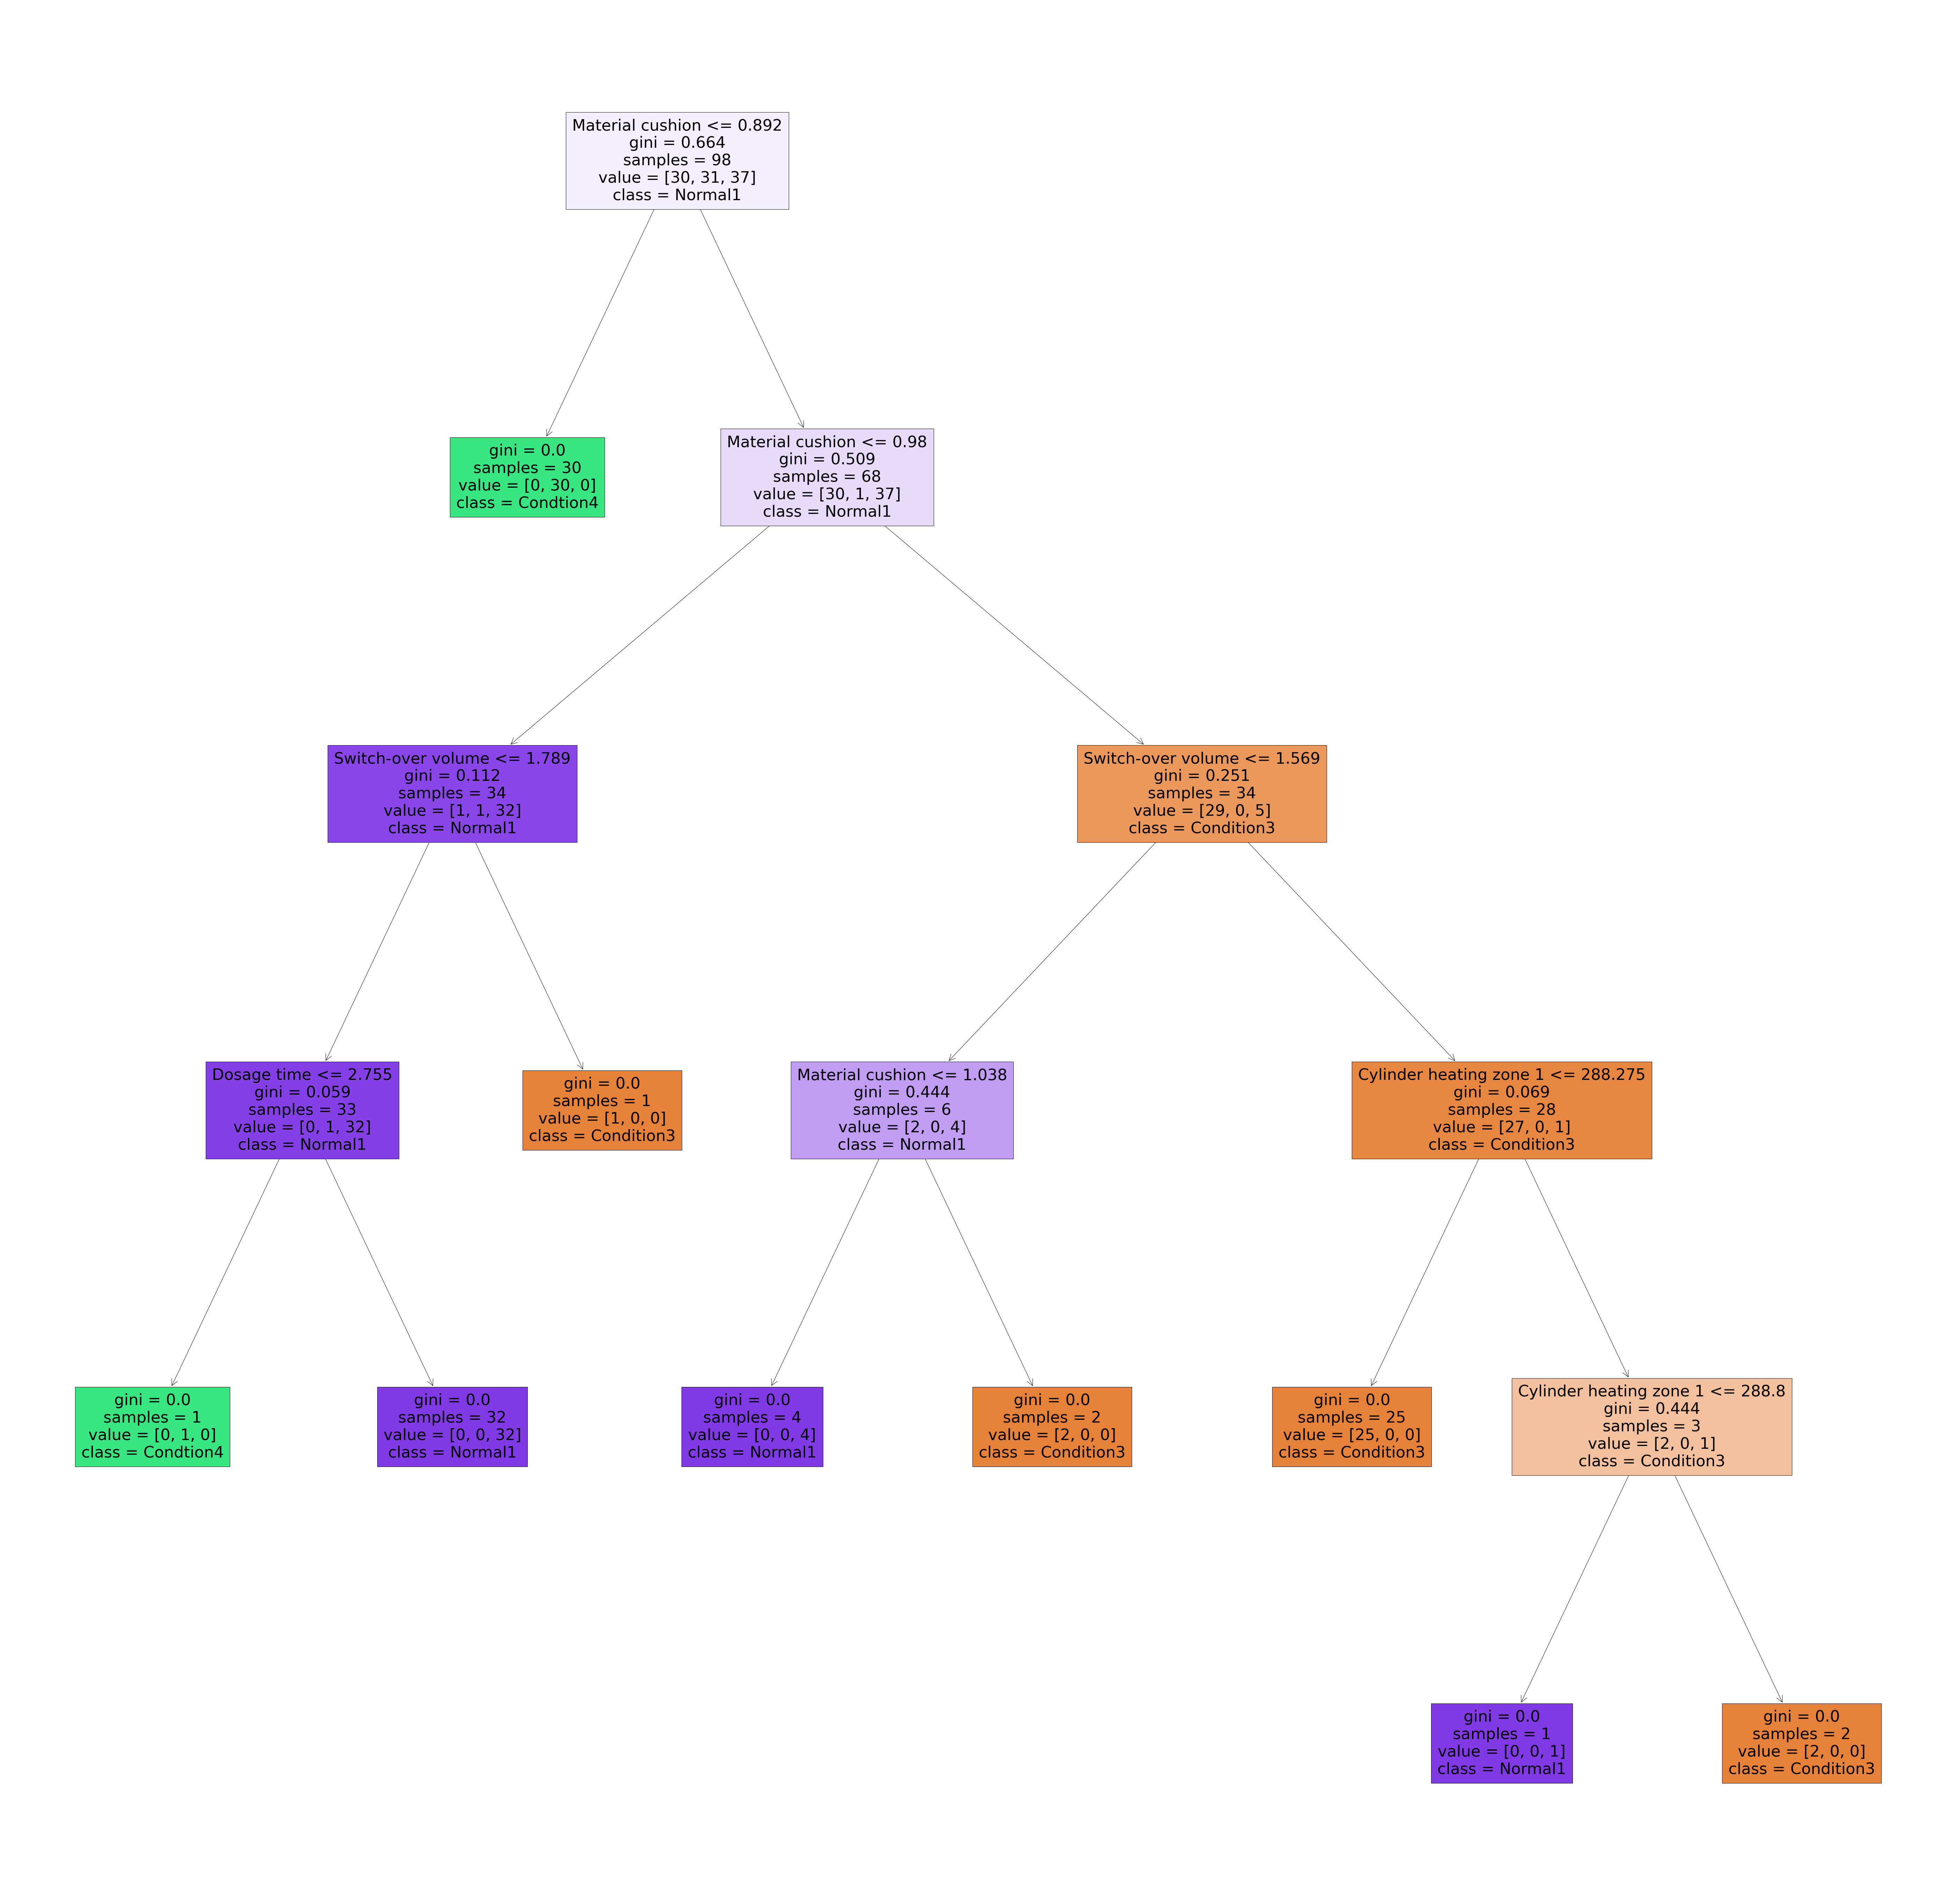

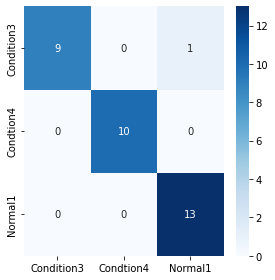

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

Tree Depth = 5


Fold Group  3



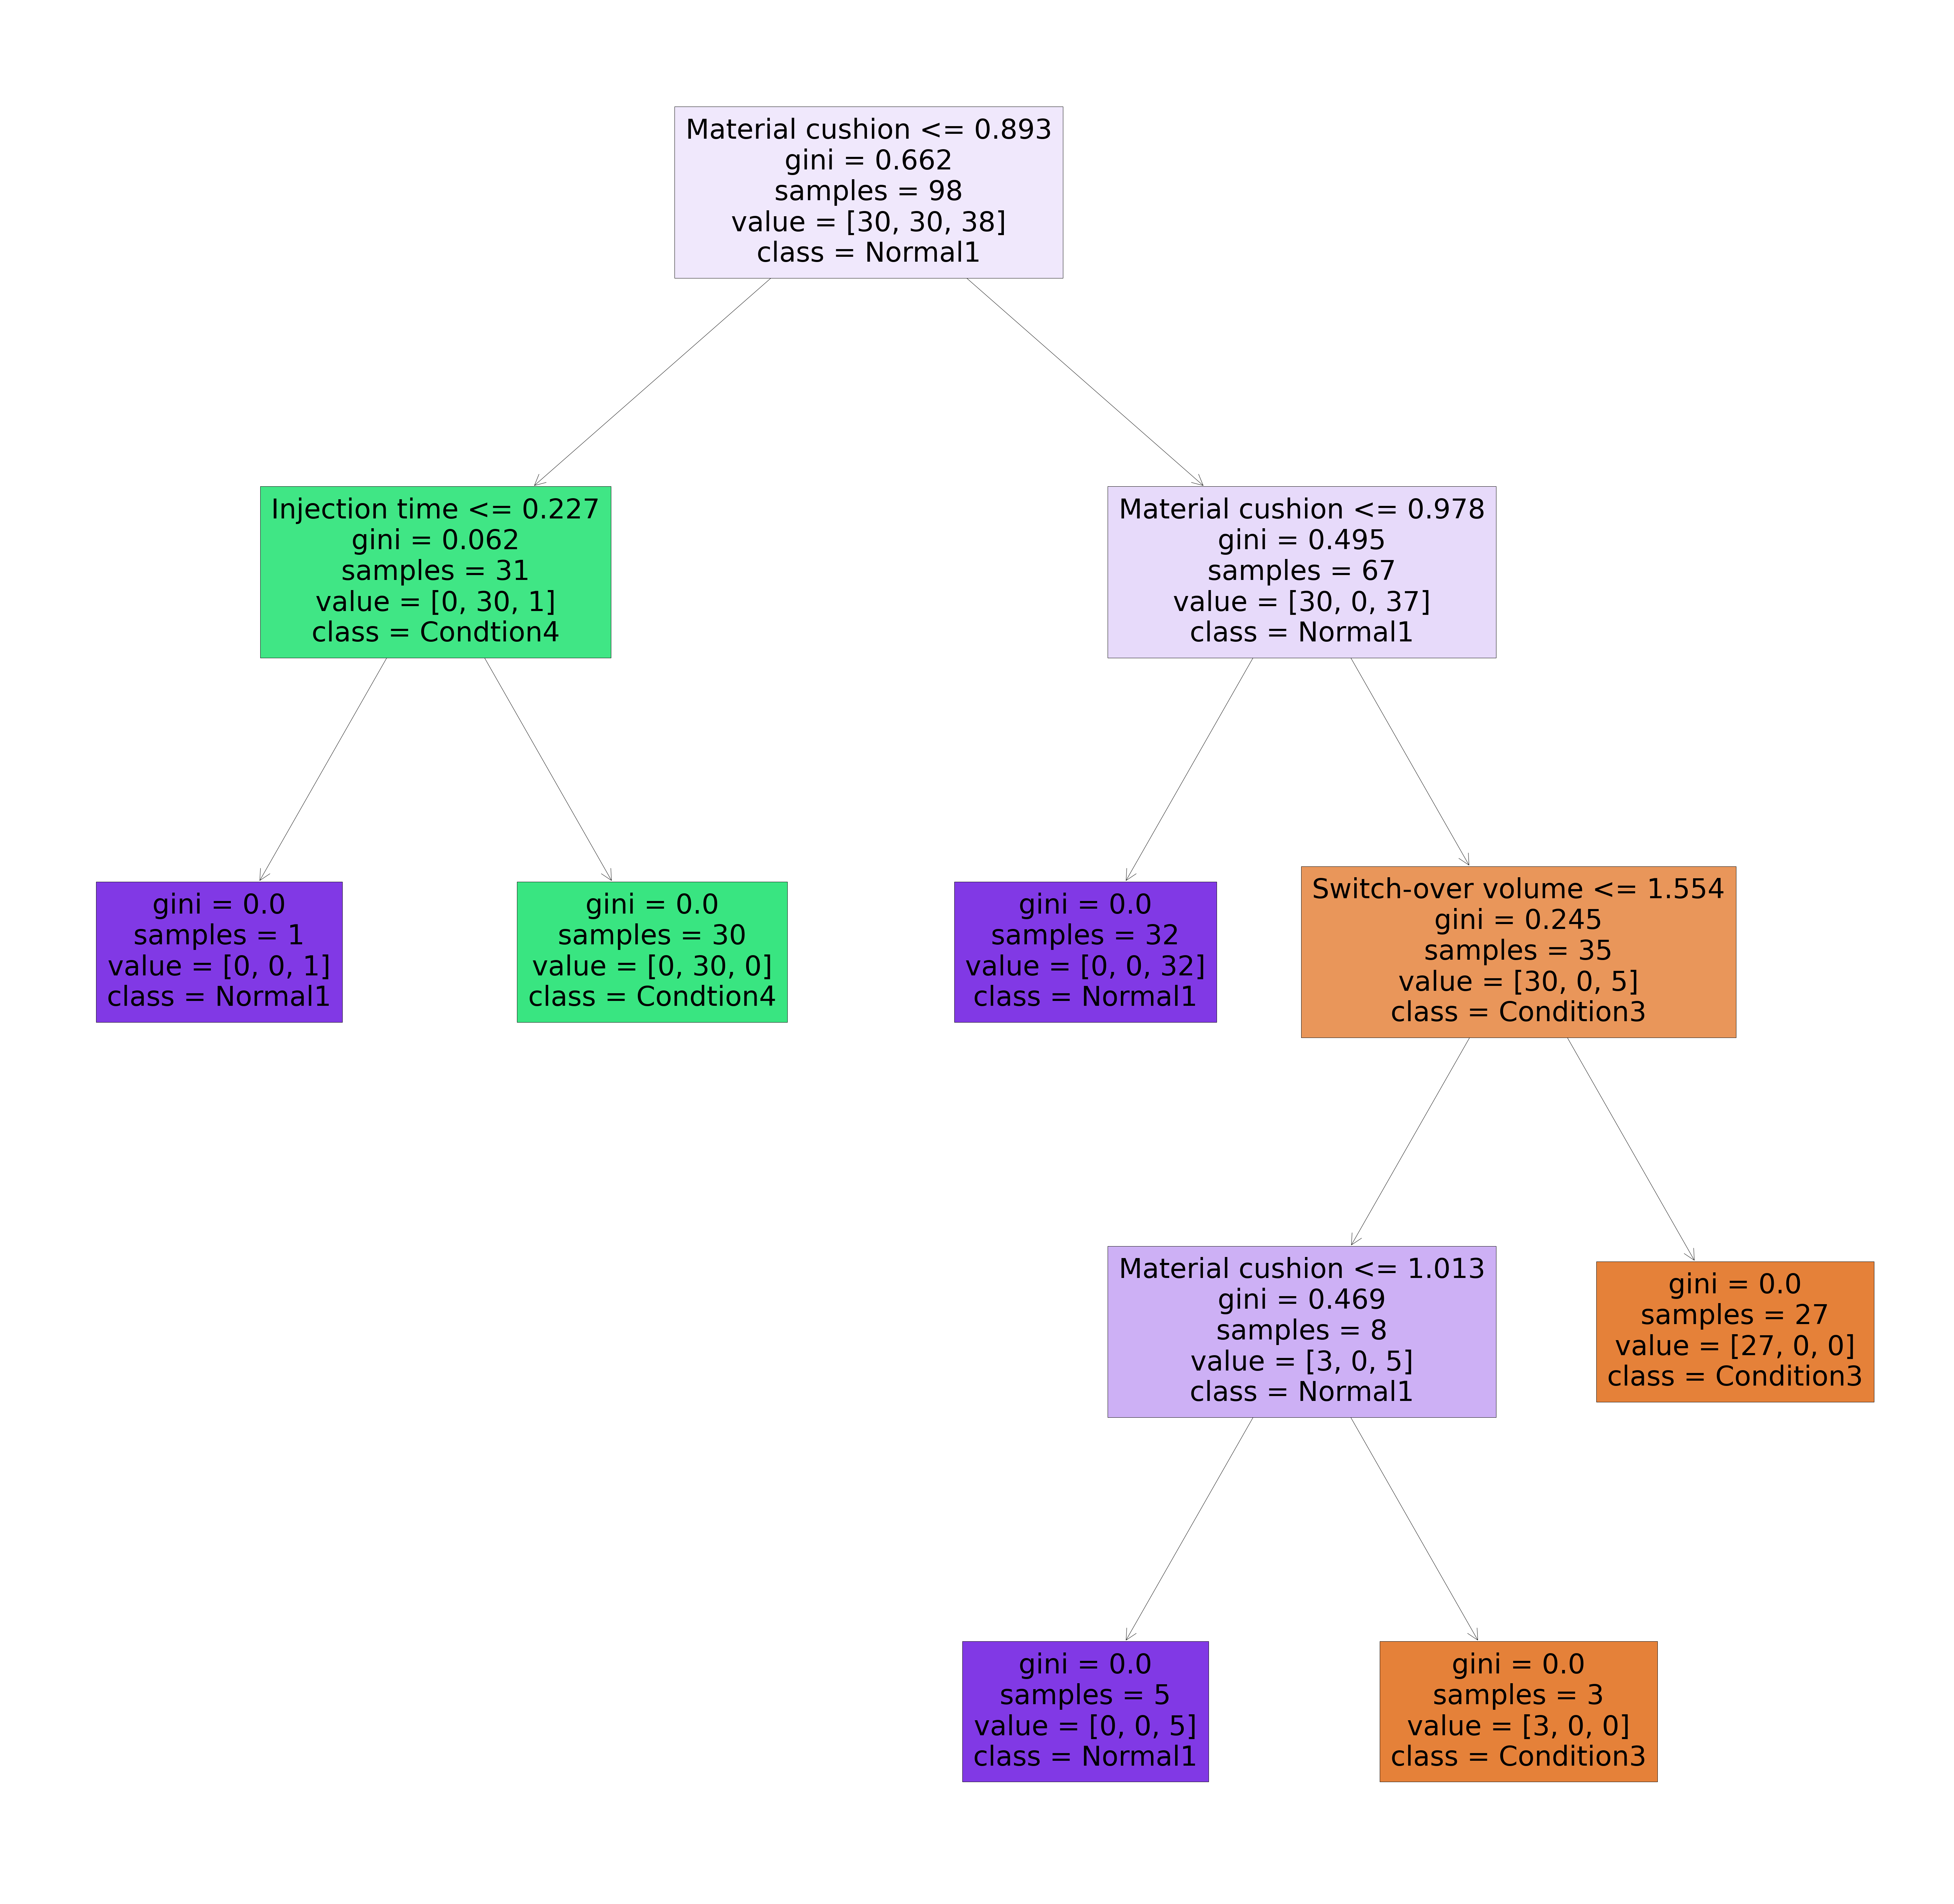

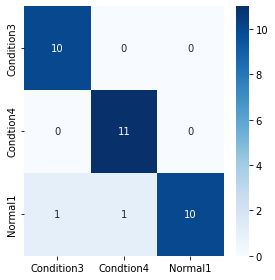

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       0.92      1.00      0.96        11
     Normal1       1.00      0.83      0.91        12

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

Tree Depth = 4


Fold Group  4



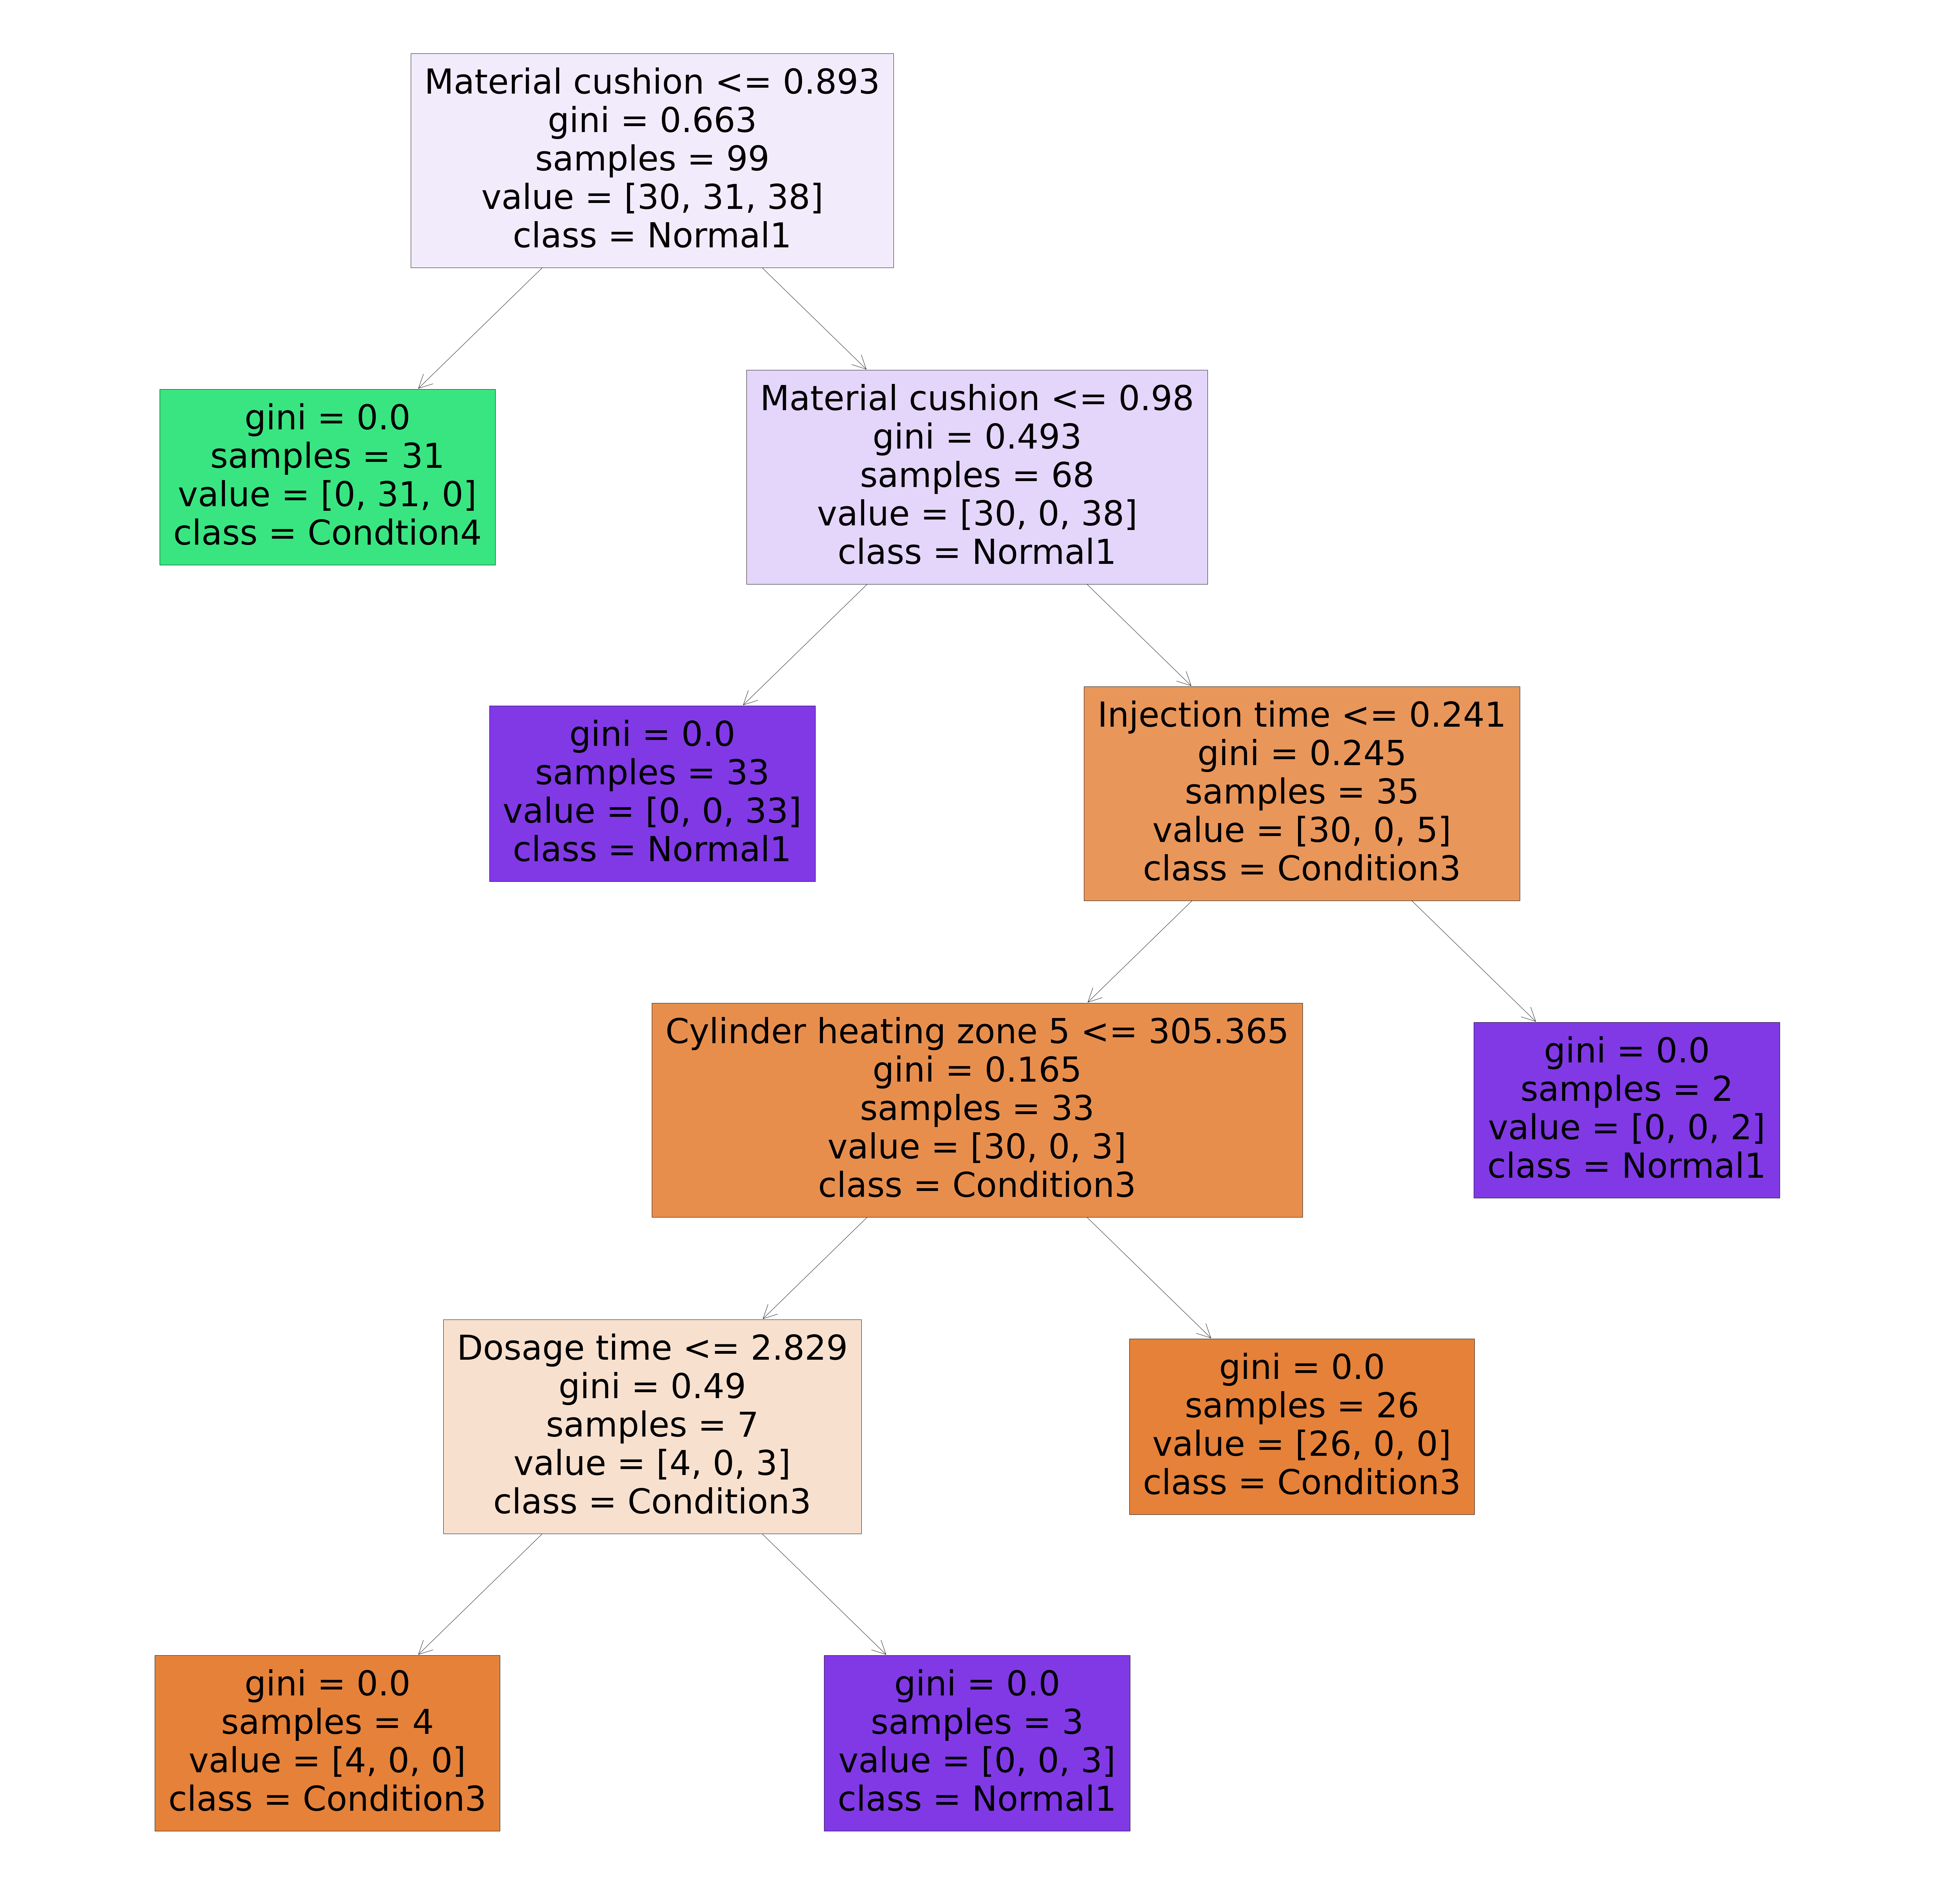

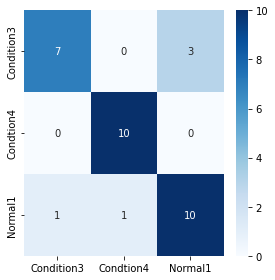

              precision    recall  f1-score   support

  Condition3       0.88      0.70      0.78        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.77      0.83      0.80        12

    accuracy                           0.84        32
   macro avg       0.85      0.84      0.84        32
weighted avg       0.85      0.84      0.84        32

Tree Depth = 5


average C3 Accuracy =  0.8905
average C4 Accuracy =  0.9564
average N1 Accuracy =  0.8709
average Net Accuracy =  0.9003
Max tree depth (integer) =  5


In [4]:
# Default Decision Tree

model = dt(random_state = 0)
n = 1

#creating lists to store the calculated accuracies for each fold group, allowing the average to be calculated later

C3AL = []    # Condition3 Accuracy List
C4AL = []    # Condition4 Accuracy List
N1AL = []    # Normal1 Accuracy List

NALd = []    # Net Accuracy List
TDL = []    # Tree Depth List

for trainIndex, testIndex in cv.split(X,Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]                 #train/test data allocation
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X,train_Y)                   #model building and prediction
    pred_Y = model.predict(test_X)               #test data
    fig = plt.figure(figsize=(100, 100))
    tree.plot_tree(model, feature_names=X.columns,class_names= YClass,filled=True)
    print('')
    CM = confusion_matrix(test_Y, pred_Y)        #confusion matrix
    
    fig, ax = plt.subplots(figsize=(4,4))        #CM visualisation
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NALd.append(NetAcc)
    
    TD = model.get_depth()
    print('Tree Depth = ' +str(TD))
    TDL.append(TD)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NALd).round(4))

print('Max tree depth (integer) = ', np.max(TDL))



Fold Group  1


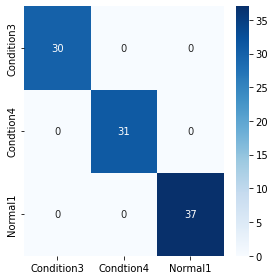

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Tree Depth = 3


Fold Group  2


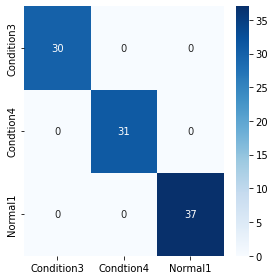

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Tree Depth = 5


Fold Group  3


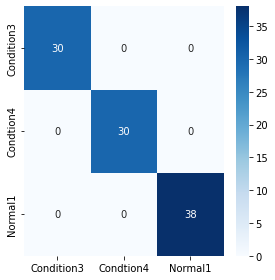

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        30
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Tree Depth = 4


Fold Group  4


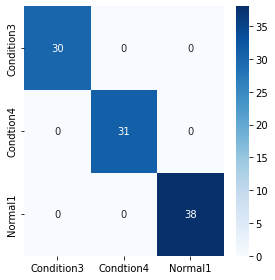

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

Tree Depth = 5


average C3 Accuracy =  1.0
average C4 Accuracy =  1.0
average N1 Accuracy =  1.0
average Net Accuracy =  1.0
Max tree depth (integer) =  5


In [6]:
# Nics training Decision Tree

model = dt(random_state = 0)
n = 1

#creating lists to store the calculated accuracies for each fold group, allowing the average to be calculated later

C3AL = []    # Condition3 Accuracy List
C4AL = []    # Condition4 Accuracy List
N1AL = []    # Normal1 Accuracy List

NALdt = []    # Net Accuracy List
TDL = []    # Tree Depth List

for trainIndex, testIndex in cv.split(X,Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]                 #train/test data allocation
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X,train_Y)                   #model building and prediction
    pred_trainY = model.predict(train_X)               #test data
    CM = confusion_matrix(train_Y, pred_trainY)        #confusion matrix
    
    fig, ax = plt.subplots(figsize=(4,4))        #CM visualisation
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    print(classification_report(train_Y,pred_trainY))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(train_Y,pred_trainY)
    NALdt.append(NetAcc)
    
    TD = model.get_depth()
    print('Tree Depth = ' +str(TD))
    TDL.append(TD)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NALdt).round(4))

print('Max tree depth (integer) = ', np.max(TDL))


In [7]:
#prepruning optimising with for-loops

In [8]:
MTD = np.max(TDL)

colNames = ['max depth','min leaf','C3A','C4A','N1A','NetA']
AccDF = pd.DataFrame(columns = colNames)
AccIndex = 0

for i in range(2, MTD+1):                  #choose depth from 2 ()
    depth = i
    print('\nmax_depth', i)
    
        
    for j in range(25):                                         #...choose leaf size next...
        
        N1AL = []    # Normal1 Accuracy List
        C3AL = []    # Condition3 Accuracy List
        C4AL = []    # Condition4 Accuracy List
        NAL = []
        
        print('min_samples_leaf = ', j+1)
        
        model = dt(random_state = 0, max_depth = depth, min_samples_leaf = j+1)

        for trainIndex, testIndex in cv.split(X,Y):
    
            train_X = X.iloc[trainIndex]                 #train/test data allocation
            test_X = X.iloc[testIndex]
            train_Y = Y.iloc[trainIndex]
            test_Y = Y.iloc[testIndex]
    
            model.fit(train_X,train_Y)                   #model building and prediction
            pred_Y = model.predict(test_X)
    
            CM = confusion_matrix(test_Y, pred_Y)        #confusion matrix
    
            C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
            C3AL.append(C3Acc)
            C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
            C4AL.append(C4Acc)
            N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
            N1AL.append(N1Acc)
    
            NetAcc = acs(test_Y,pred_Y)
            NAL.append(NetAcc)
            
        # at the end of cross validation, calculate accuracy averages
        
        C3Amean = np.mean(C3AL).round(4)
        C4Amean = np.mean(C4AL).round(4)
        N1Amean = np.mean(N1AL).round(4)
        NetAmean = np.mean(NAL).round(4)
        
        print('NetAcc =', NetAmean)
        
        AccDF.loc[AccIndex] = [depth,j+1,C3Amean,C4Amean,N1Amean,NetAmean]#stores result in AccDF
        AccIndex = AccIndex + 1



max_depth 2
min_samples_leaf =  1
NetAcc = 0.8781
min_samples_leaf =  2
NetAcc = 0.8781
min_samples_leaf =  3
NetAcc = 0.8781
min_samples_leaf =  4
NetAcc = 0.8781
min_samples_leaf =  5
NetAcc = 0.8781
min_samples_leaf =  6
NetAcc = 0.8781
min_samples_leaf =  7
NetAcc = 0.8781
min_samples_leaf =  8
NetAcc = 0.8781
min_samples_leaf =  9
NetAcc = 0.8781
min_samples_leaf =  10
NetAcc = 0.8781
min_samples_leaf =  11
NetAcc = 0.8781
min_samples_leaf =  12
NetAcc = 0.8781
min_samples_leaf =  13
NetAcc = 0.8781
min_samples_leaf =  14
NetAcc = 0.8781
min_samples_leaf =  15
NetAcc = 0.8781
min_samples_leaf =  16
NetAcc = 0.8781
min_samples_leaf =  17
NetAcc = 0.8781
min_samples_leaf =  18
NetAcc = 0.8781
min_samples_leaf =  19
NetAcc = 0.8781
min_samples_leaf =  20
NetAcc = 0.8781
min_samples_leaf =  21
NetAcc = 0.8781
min_samples_leaf =  22
NetAcc = 0.8781
min_samples_leaf =  23
NetAcc = 0.8781
min_samples_leaf =  24
NetAcc = 0.8781
min_samples_leaf =  25
NetAcc = 0.8781

max_depth 3
min_samp

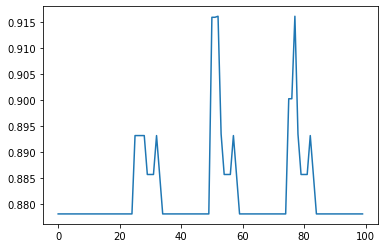

In [9]:
#plot net accuracy against index number. refer to AccDF for hyperparameters of each index
plt.plot(AccDF['NetA'])

In [27]:
AccDF.sort_values(by = 'NetA', ascending = False)

max depth  min leaf     C3A     C4A     N1A    NetA
52        4.0       3.0  0.9091  0.9564  0.9042  0.9162
77        5.0       3.0  0.9091  0.9564  0.9042  0.9162
50        4.0       1.0  0.8967  0.9564  0.9058  0.9160
51        4.0       2.0  0.8967  0.9564  0.9058  0.9160
75        5.0       1.0  0.8905  0.9564  0.8709  0.9003
..        ...       ...     ...     ...     ...     ...
35        3.0      11.0  0.8183  0.9564  0.8914  0.8781
34        3.0      10.0  0.8183  0.9564  0.8914  0.8781
24        2.0      25.0  0.8183  0.9564  0.8914  0.8781
23        2.0      24.0  0.8183  0.9564  0.8914  0.8781
99        5.0      25.0  0.8183  0.9564  0.8914  0.8781

[100 rows x 6 columns]



Fold Group  1


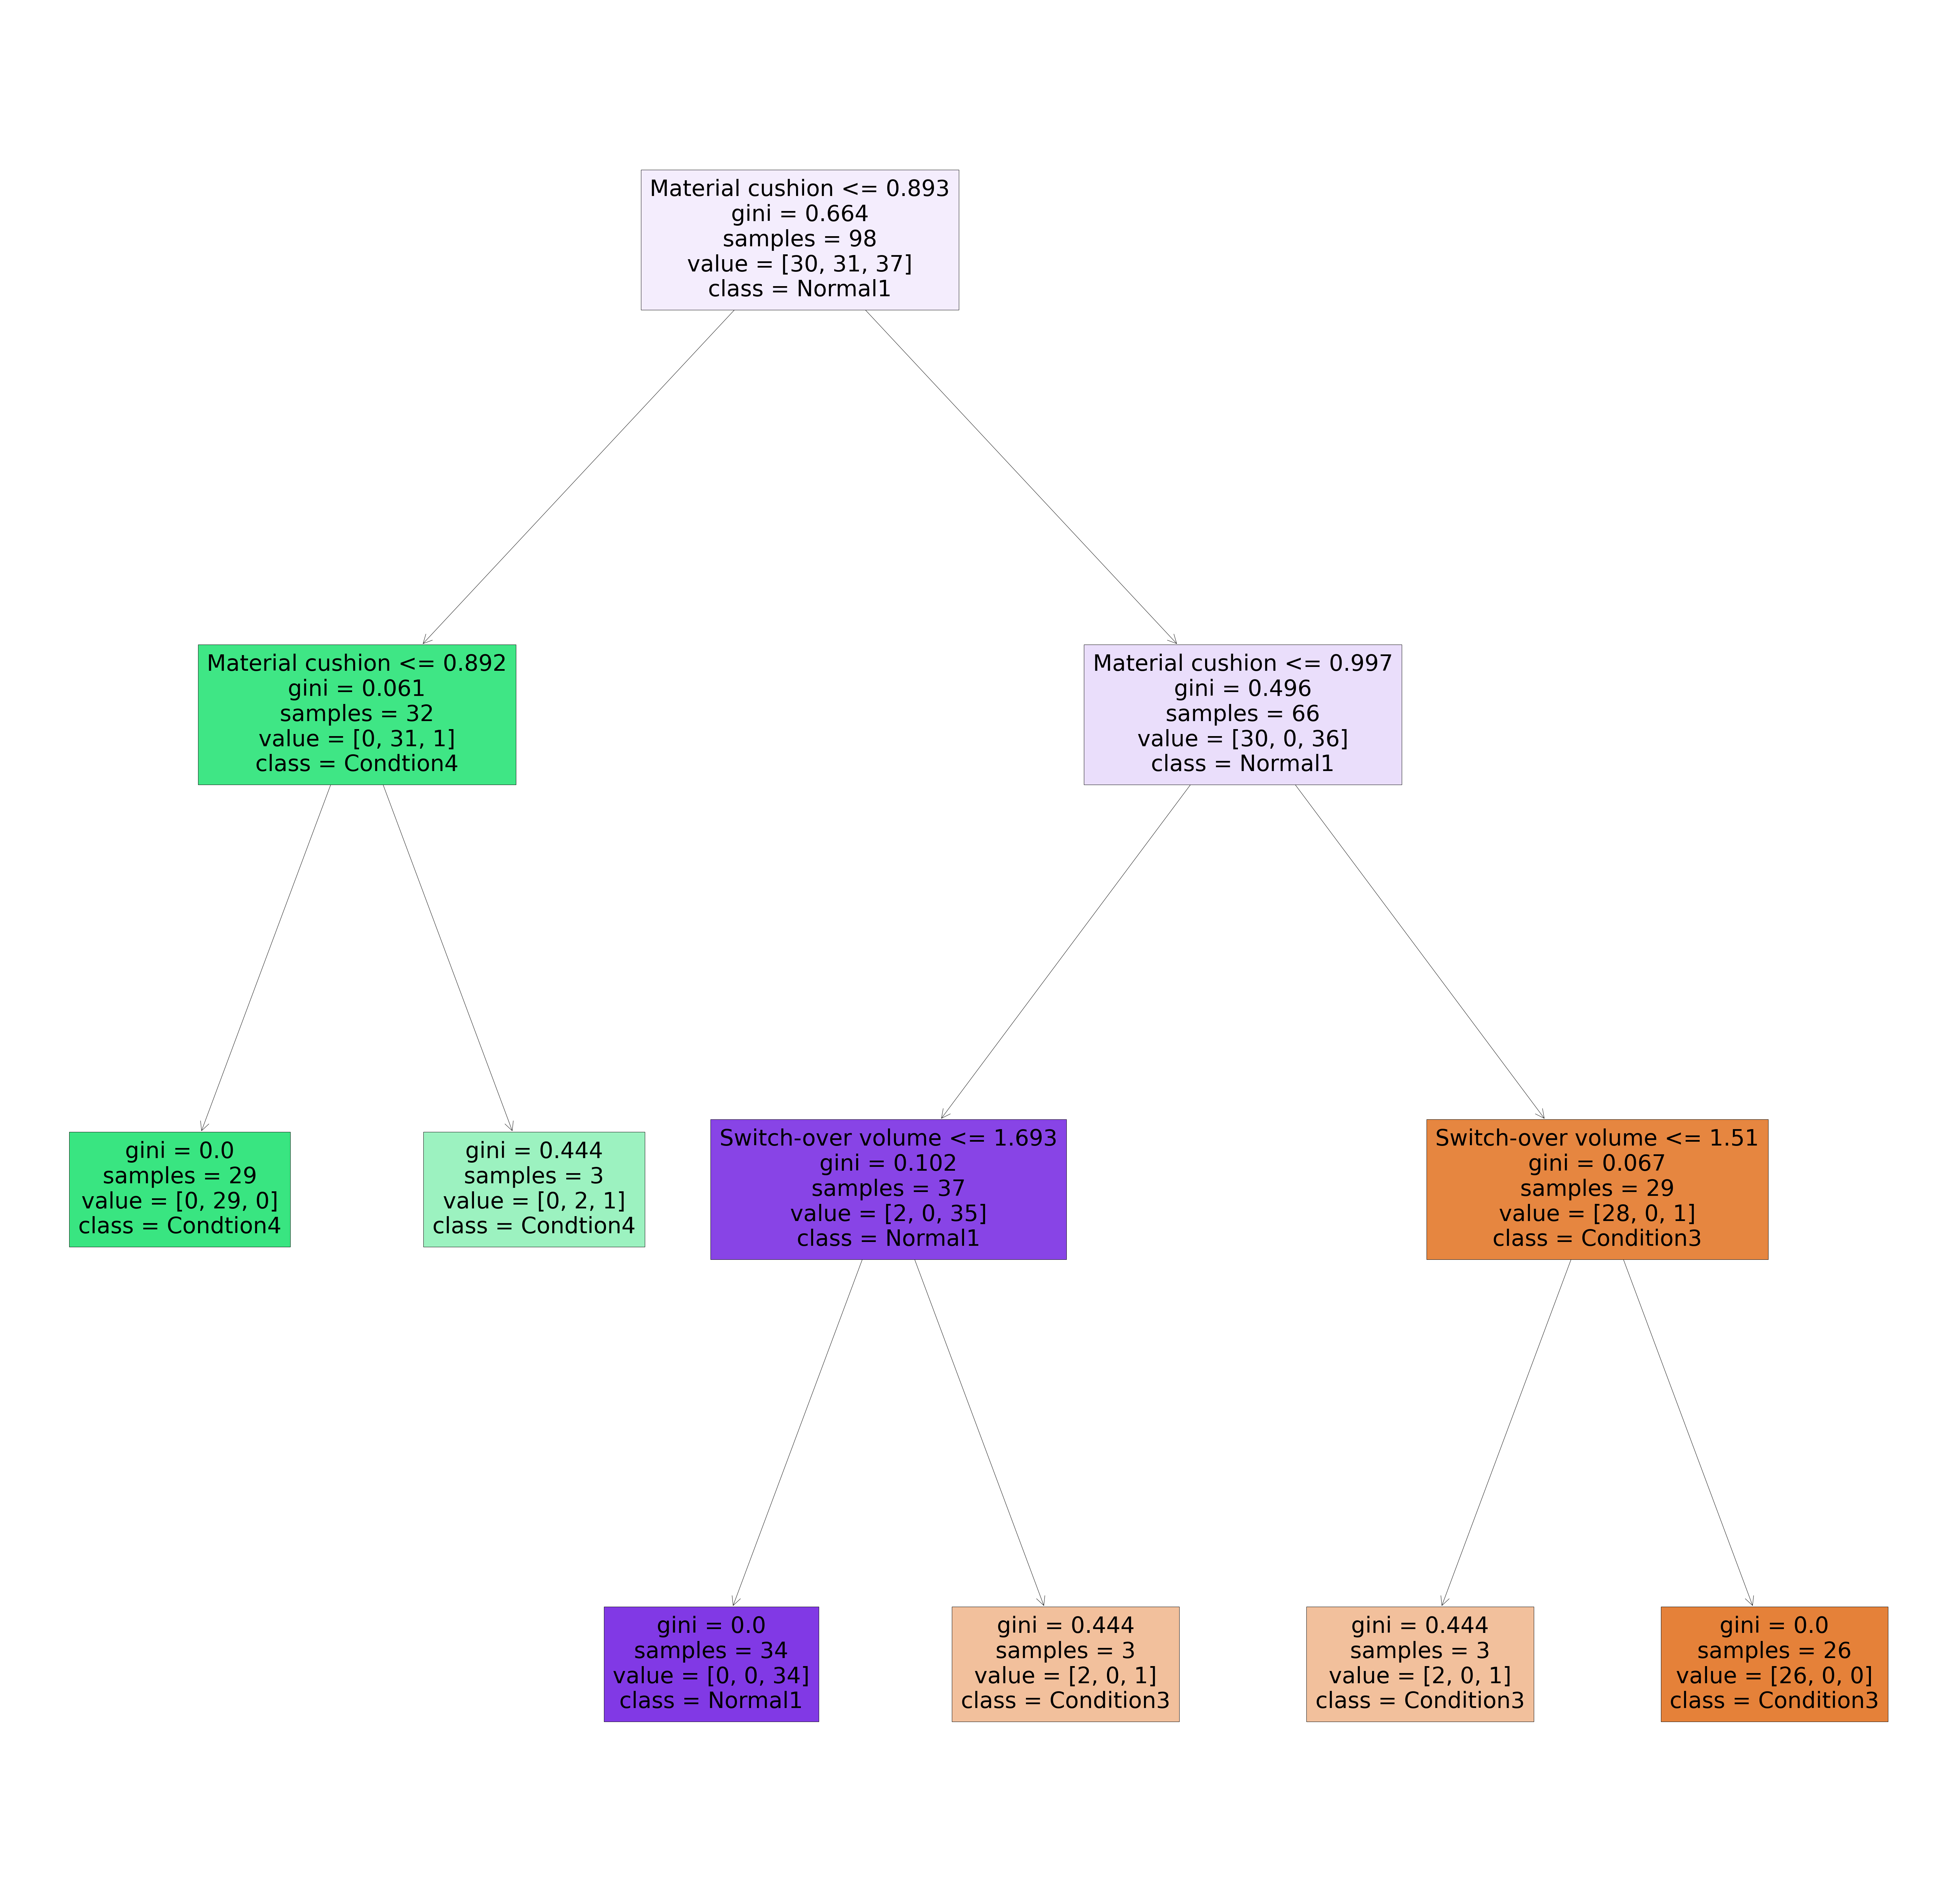

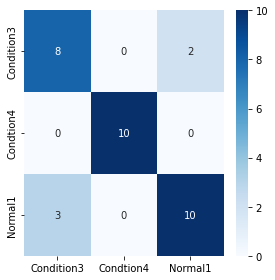

              precision    recall  f1-score   support

  Condition3       0.73      0.80      0.76        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.83      0.77      0.80        13

    accuracy                           0.85        33
   macro avg       0.85      0.86      0.85        33
weighted avg       0.85      0.85      0.85        33



Fold Group  2


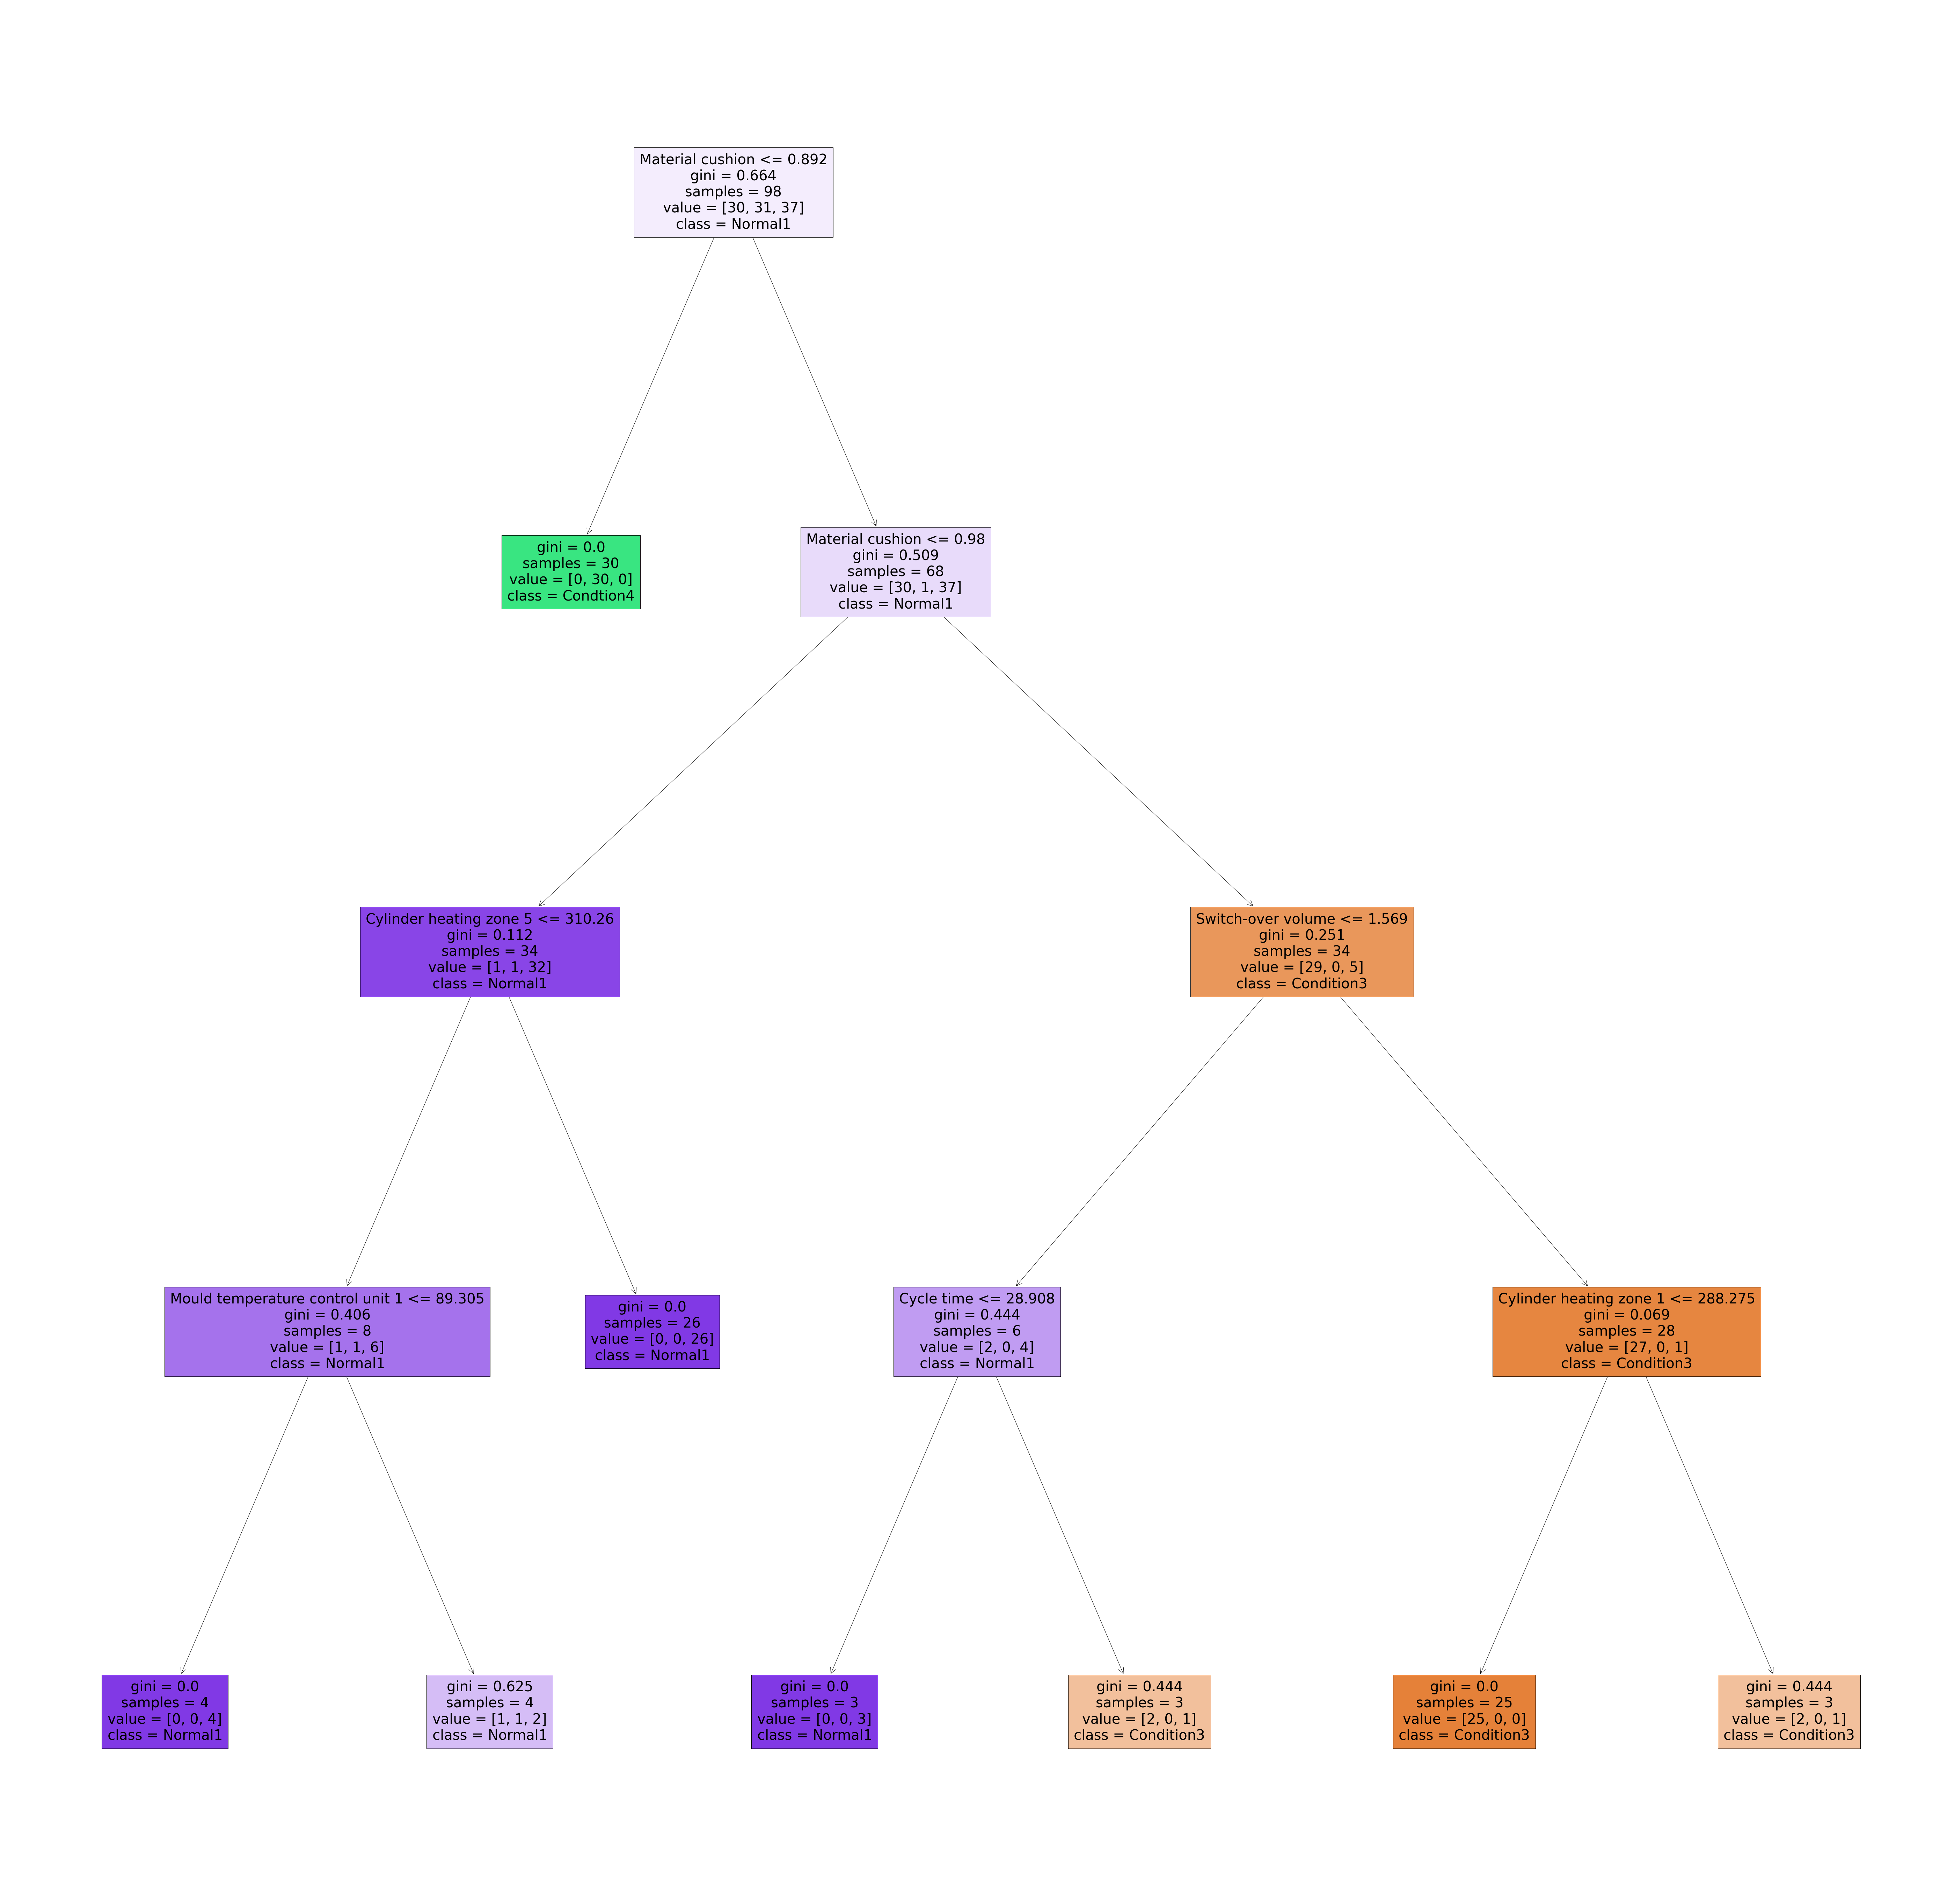

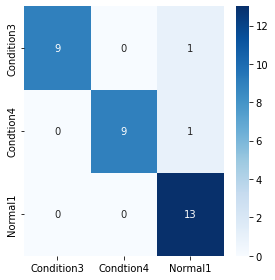

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      0.90      0.95        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33



Fold Group  3


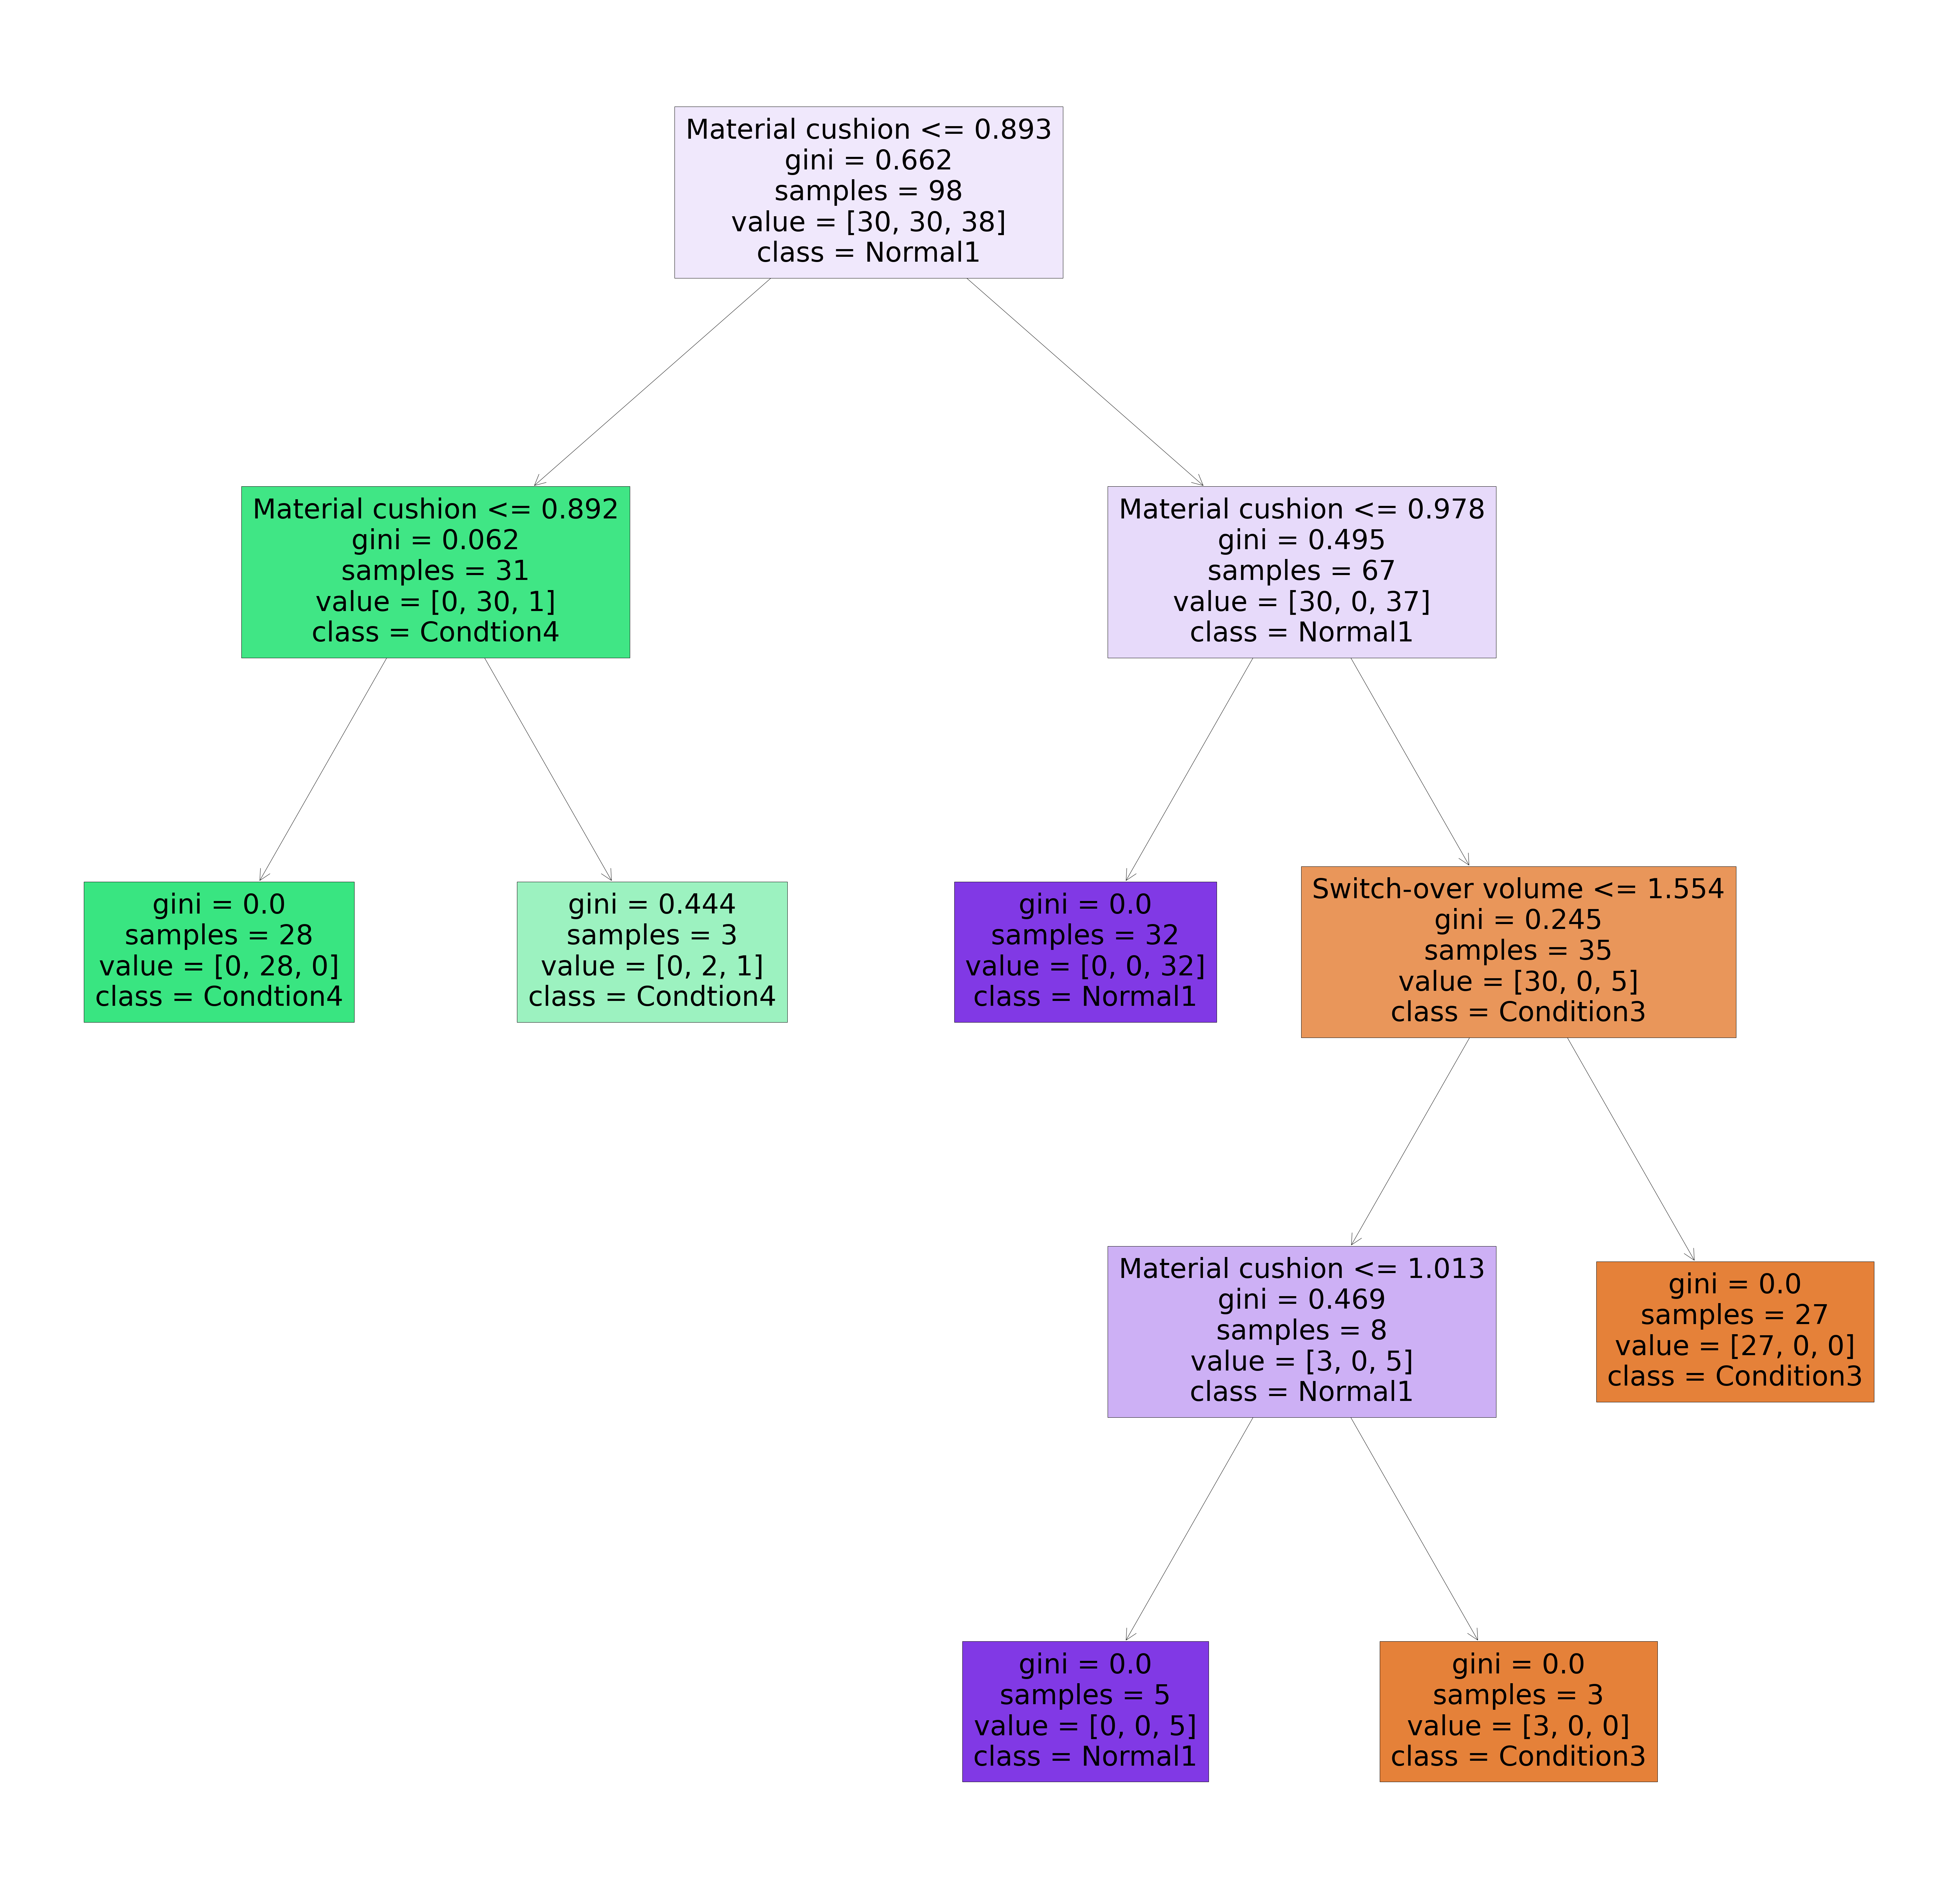

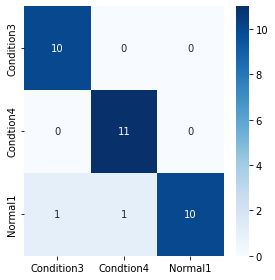

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       0.92      1.00      0.96        11
     Normal1       1.00      0.83      0.91        12

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



Fold Group  4


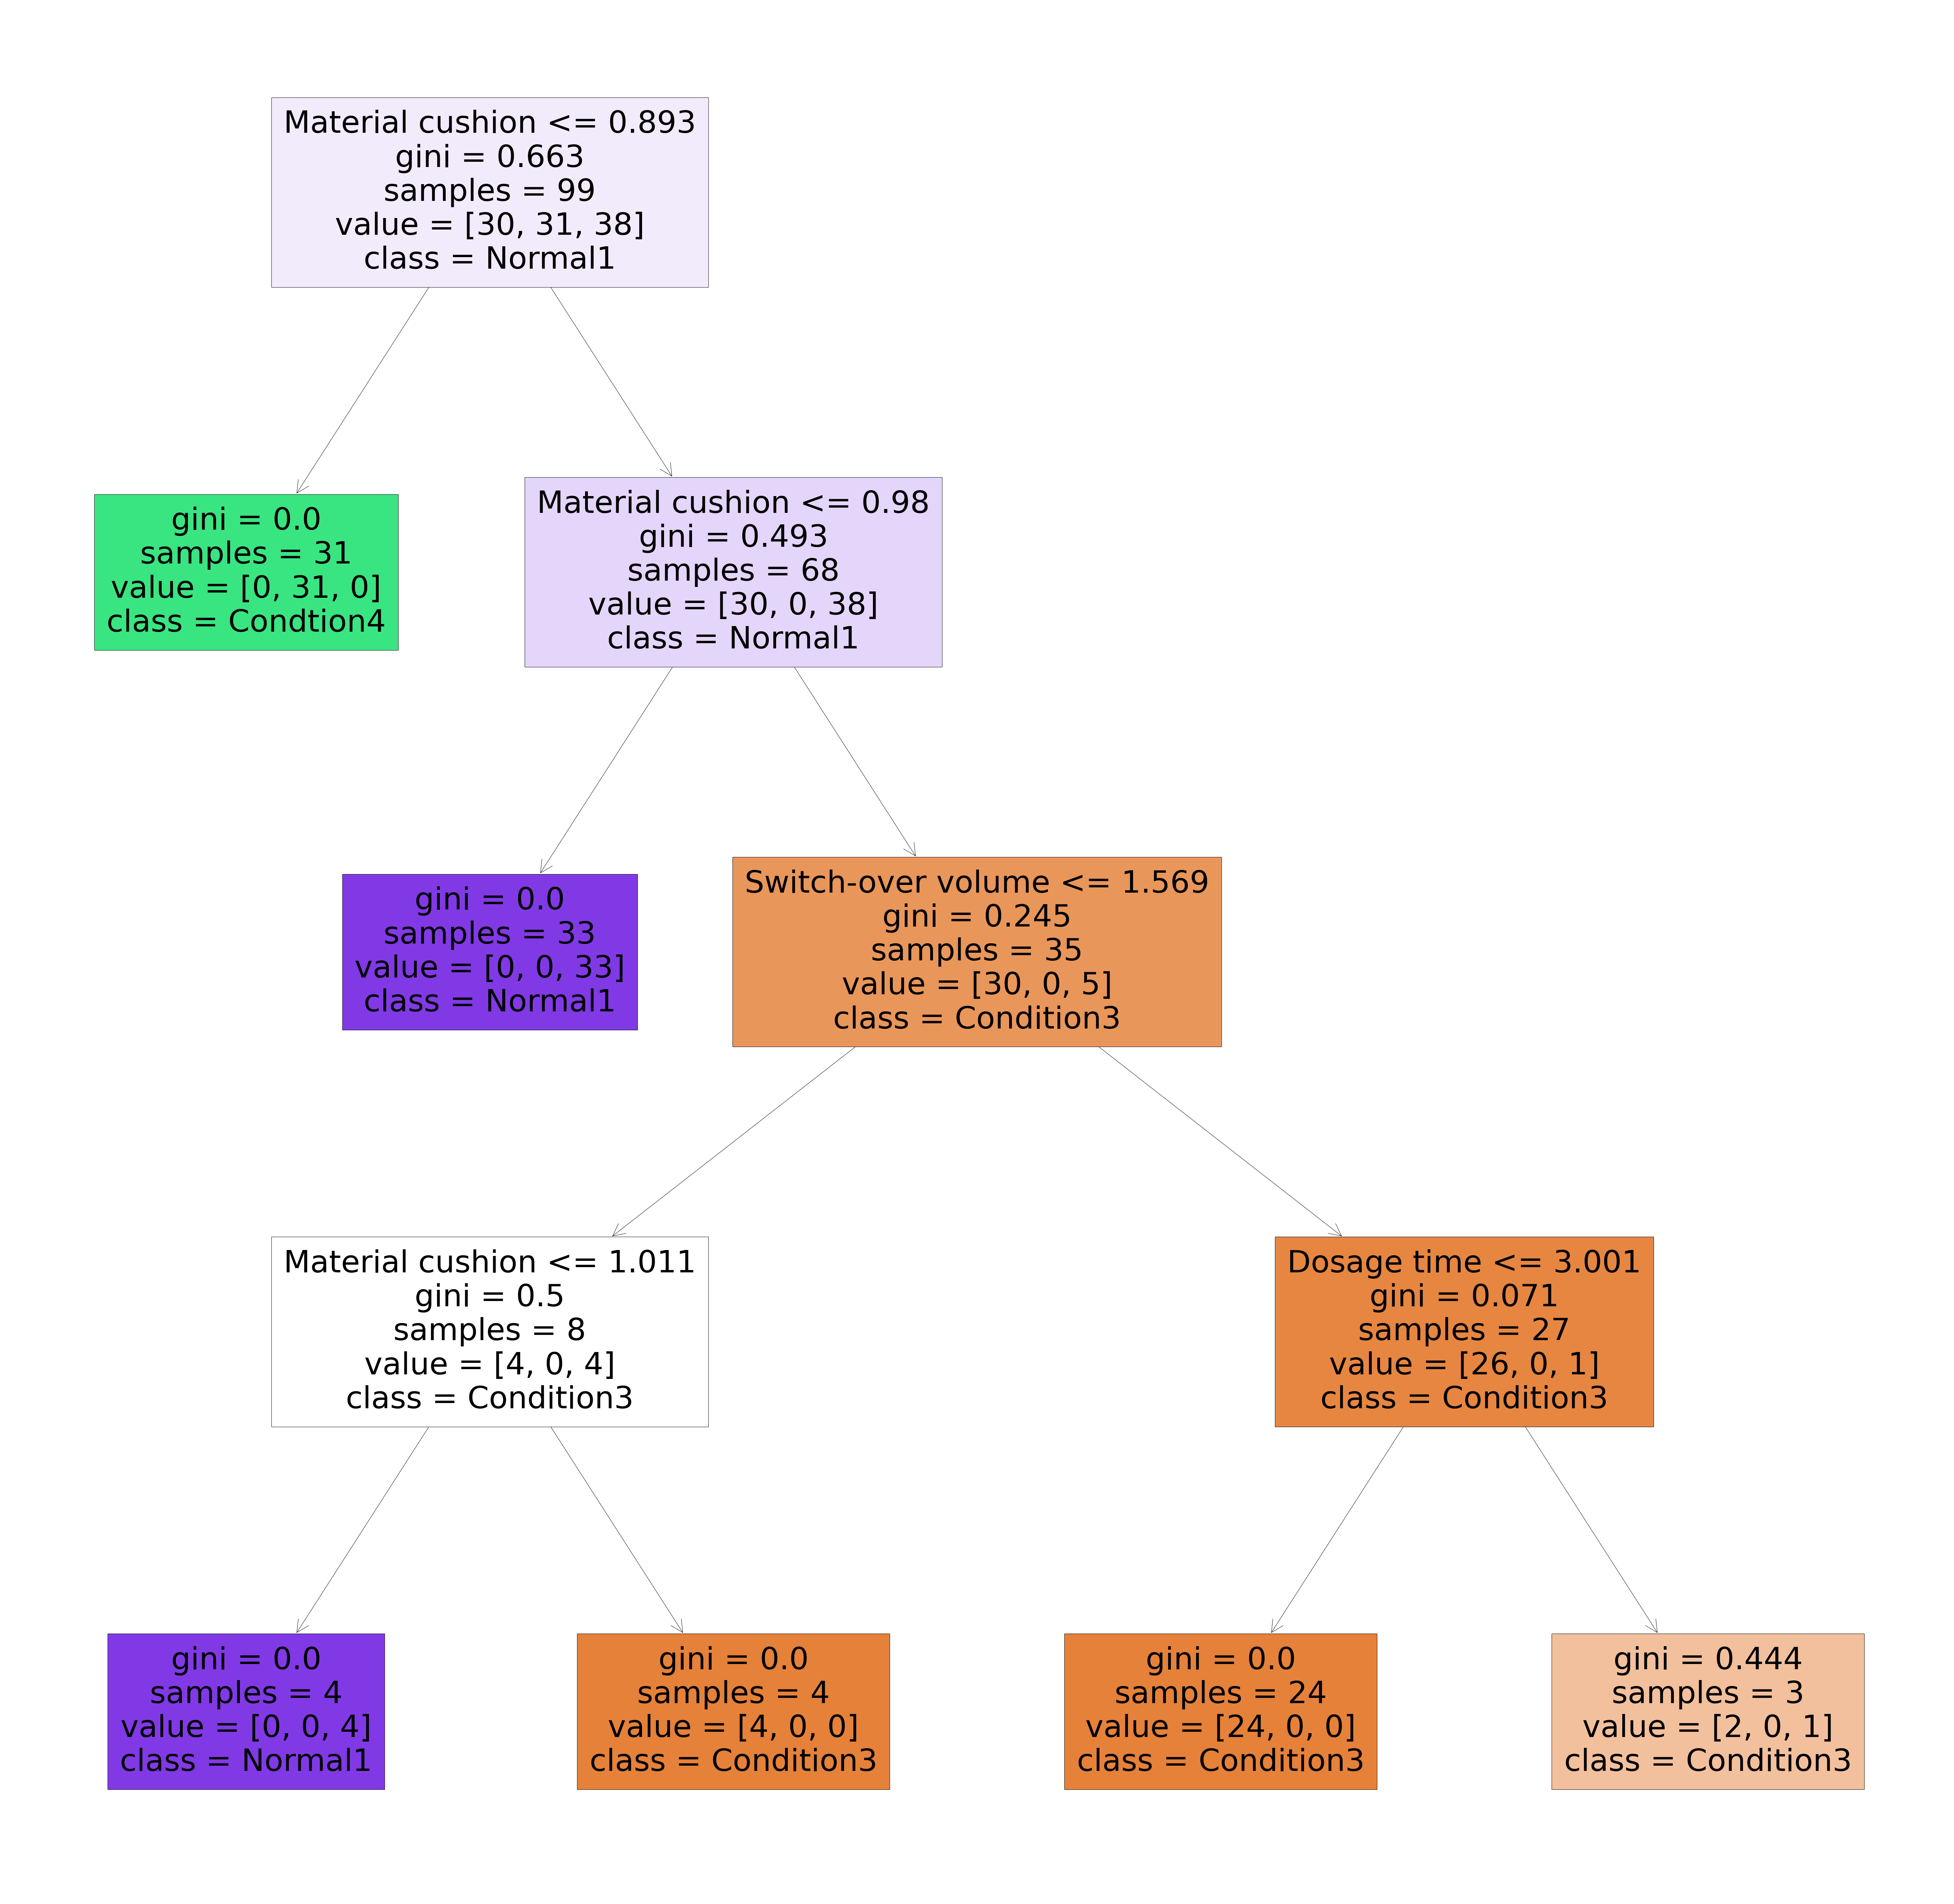

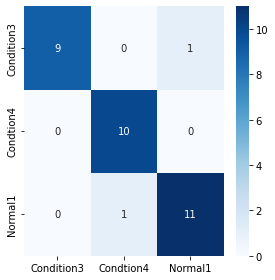

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

max_depth = 4
min_samples_leaf = 3
average C3 Accuracy =  0.9091
average C4 Accuracy =  0.9564
average N1 Accuracy =  0.9042
average Net Accuracy =  0.9162


In [10]:
# Optimized tree
tempdepth = 4       #choose model parameters
templeaf = 3

model = dt(random_state = 0, max_depth = tempdepth, min_samples_leaf = templeaf)
n = 1

C3AL = []    
C4AL = []    
N1AL = []    
NAL = []

for trainIndex, testIndex in cv.split(X,Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]                
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X,train_Y)                   
    pred_Y = model.predict(test_X)
    fig = plt.figure(figsize=(100, 100))
    tree.plot_tree(model, feature_names=X.columns,class_names= YClass,filled=True)
    
    CM = confusion_matrix(test_Y, pred_Y)       
    
    fig, ax = plt.subplots(figsize=(4,4))       
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)

print('max_depth =', tempdepth)
print('min_samples_leaf =', templeaf)
print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))



Fold Group  1


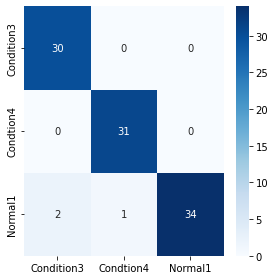

              precision    recall  f1-score   support

  Condition3       0.94      1.00      0.97        30
  Condition4       0.97      1.00      0.98        31
     Normal1       1.00      0.92      0.96        37

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98

Tree Depth = 3


Fold Group  2


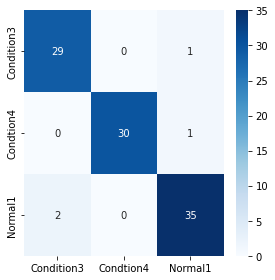

              precision    recall  f1-score   support

  Condition3       0.94      0.97      0.95        30
  Condition4       1.00      0.97      0.98        31
     Normal1       0.95      0.95      0.95        37

    accuracy                           0.96        98
   macro avg       0.96      0.96      0.96        98
weighted avg       0.96      0.96      0.96        98

Tree Depth = 4


Fold Group  3


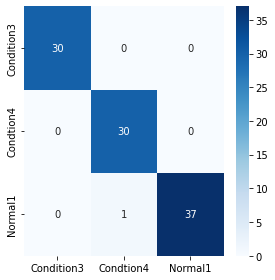

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       0.97      1.00      0.98        30
     Normal1       1.00      0.97      0.99        38

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98

Tree Depth = 4


Fold Group  4


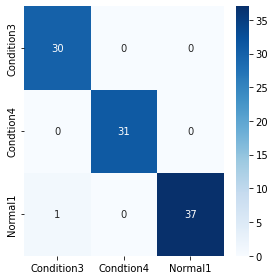

              precision    recall  f1-score   support

  Condition3       0.97      1.00      0.98        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      0.97      0.99        38

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

Tree Depth = 4


average C3 Accuracy =  0.9602
average C4 Accuracy =  0.9841
average N1 Accuracy =  0.9865
average Net Accuracy =  0.9771
Max tree depth (integer) =  4


In [30]:
#### Nics training Decision Tree optmised to compare overfit
tempdepth = 4       #choose model parameters
templeaf = 3

model = dt(random_state = 0, max_depth = tempdepth, min_samples_leaf = templeaf)
n = 1

#creating lists to store the calculated accuracies for each fold group, allowing the average to be calculated later

C3AL = []    # Condition3 Accuracy List
C4AL = []    # Condition4 Accuracy List
N1AL = []    # Normal1 Accuracy List

NAL = []    # Net Accuracy List
TDL = []    # Tree Depth List

for trainIndex, testIndex in cv.split(X,Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]                 #train/test data allocation
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X,train_Y)                   #model building and prediction
    pred_trainY = model.predict(train_X)               #test data
    
    CM = confusion_matrix(train_Y, pred_trainY)        #confusion matrix
    
    fig, ax = plt.subplots(figsize=(4,4))        #CM visualisation
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    print(classification_report(train_Y,pred_trainY))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(train_Y,pred_trainY)
    NAL.append(NetAcc)
    
    TD = model.get_depth()
    print('Tree Depth = ' +str(TD))
    TDL.append(TD)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))

print('Max tree depth (integer) = ', np.max(TDL))



 Iteration No. 1
Training data length: 98
Verification data length: 33
ccp alpha wil give list of values : [0.         0.01970443 0.01977041 0.03861004 0.27563729 0.30995963] 

Impurities in Decision Tree : [0.         0.01970443 0.03947484 0.07808488 0.35372217 0.6636818 ] 

Last node in Decision tree is 11 and ccp_alpha for last node is 0.30995962856385584
Last node in Decision tree is 9 and ccp_alpha for last node is 0.30995962856385584
Last node in Decision tree is 7 and ccp_alpha for last node is 0.30995962856385584
Last node in Decision tree is 5 and ccp_alpha for last node is 0.30995962856385584
Last node in Decision tree is 3 and ccp_alpha for last node is 0.30995962856385584
Last node in Decision tree is 1 and ccp_alpha for last node is 0.30995962856385584


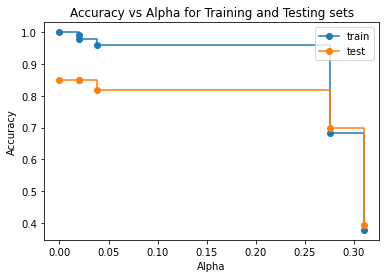

Confusion Matrix:
 [[ 6  0  4]
 [ 0 10  0]
 [ 2  0 11]]
Machine Quality Accuracy for Condition3: 0.6
Machine Quality Accuracy for Condition4: 1.0
Machine Quality Accuracy for Normal1: 0.85
Overall Accuracy of Post-Pruned Tree: 0.82 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

  Condition3       0.75      0.60      0.67        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.73      0.85      0.79        13

    accuracy                           0.82        33
   macro avg       0.83      0.82      0.82        33
weighted avg       0.82      0.82      0.81        33



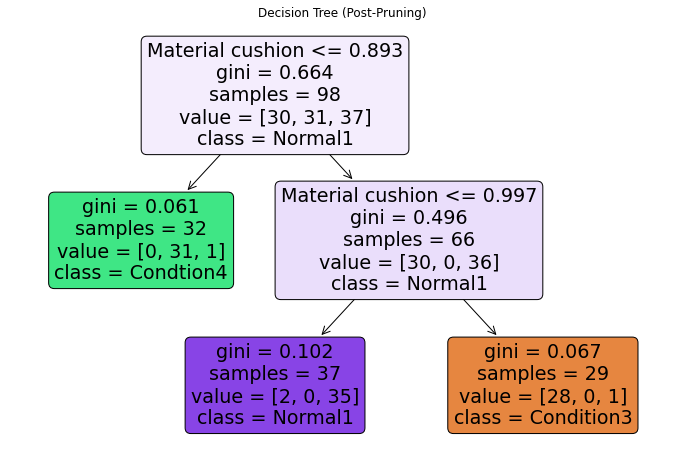

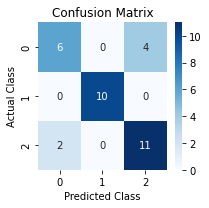


 Iteration No. 2
Training data length: 98
Verification data length: 33
ccp alpha wil give list of values : [0.         0.00983965 0.0195078  0.02721088 0.04014463 0.22719088
 0.3104405 ] 

Impurities in Decision Tree : [0.         0.0196793  0.05869491 0.08590579 0.12605042 0.3532413
 0.6636818 ] 

Last node in Decision tree is 17 and ccp_alpha for last node is 0.3104405027317048
Last node in Decision tree is 13 and ccp_alpha for last node is 0.3104405027317048
Last node in Decision tree is 9 and ccp_alpha for last node is 0.3104405027317048
Last node in Decision tree is 7 and ccp_alpha for last node is 0.3104405027317048
Last node in Decision tree is 5 and ccp_alpha for last node is 0.3104405027317048
Last node in Decision tree is 3 and ccp_alpha for last node is 0.3104405027317048
Last node in Decision tree is 1 and ccp_alpha for last node is 0.3104405027317048


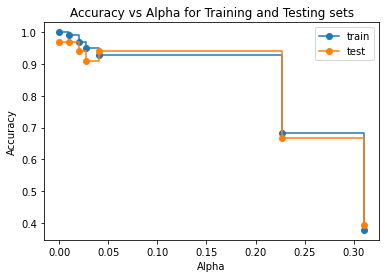

Confusion Matrix:
 [[ 9  0  1]
 [ 0 10  0]
 [ 0  0 13]]
Machine Quality Accuracy for Condition3: 0.9
Machine Quality Accuracy for Condition4: 1.0
Machine Quality Accuracy for Normal1: 1.0
Overall Accuracy of Post-Pruned Tree: 0.97 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



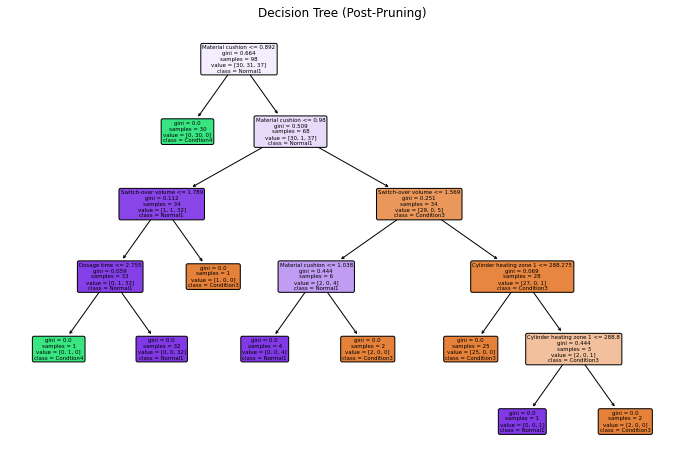

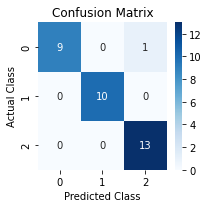


 Iteration No. 3
Training data length: 98
Verification data length: 33
ccp alpha wil give list of values : [0.         0.01974984 0.03826531 0.04919825 0.25064183 0.30436885] 

Impurities in Decision Tree : [0.         0.01974984 0.05801514 0.10721339 0.35785523 0.66222407] 

Last node in Decision tree is 11 and ccp_alpha for last node is 0.30436884647445683
Last node in Decision tree is 9 and ccp_alpha for last node is 0.30436884647445683
Last node in Decision tree is 7 and ccp_alpha for last node is 0.30436884647445683
Last node in Decision tree is 5 and ccp_alpha for last node is 0.30436884647445683
Last node in Decision tree is 3 and ccp_alpha for last node is 0.30436884647445683
Last node in Decision tree is 1 and ccp_alpha for last node is 0.30436884647445683


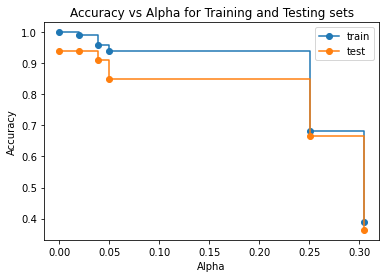

Confusion Matrix:
 [[10  0  0]
 [ 0 11  0]
 [ 1  1 10]]
Machine Quality Accuracy for Condition3: 1.0
Machine Quality Accuracy for Condition4: 1.0
Machine Quality Accuracy for Normal1: 0.83
Overall Accuracy of Post-Pruned Tree: 0.94 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       0.92      1.00      0.96        11
     Normal1       1.00      0.83      0.91        12

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



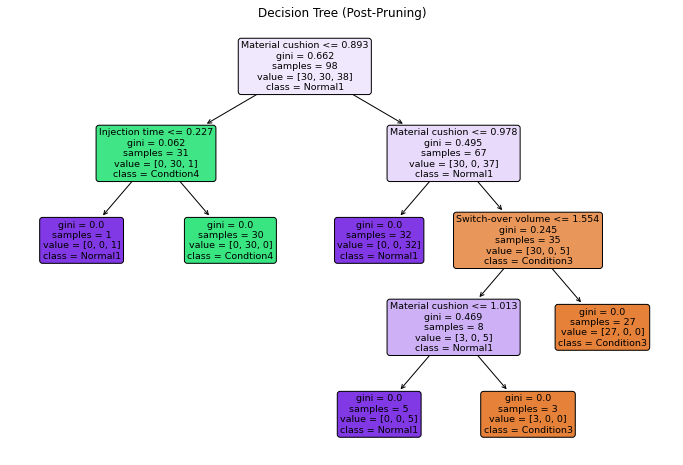

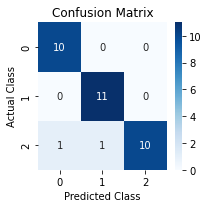


 Iteration No. 4
Training data length: 99
Verification data length: 32
ccp alpha wil give list of values : [0.         0.02754821 0.03148367 0.25210084 0.32410858] 

Impurities in Decision Tree : [0.         0.05509642 0.08658009 0.33868093 0.66278951] 

Last node in Decision tree is 11 and ccp_alpha for last node is 0.3241085843581388
Last node in Decision tree is 7 and ccp_alpha for last node is 0.3241085843581388
Last node in Decision tree is 5 and ccp_alpha for last node is 0.3241085843581388
Last node in Decision tree is 3 and ccp_alpha for last node is 0.3241085843581388
Last node in Decision tree is 1 and ccp_alpha for last node is 0.3241085843581388


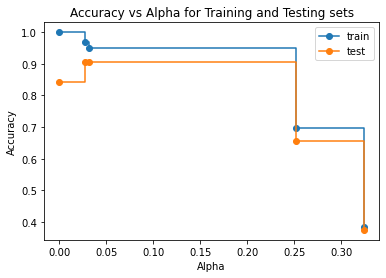

Confusion Matrix:
 [[ 9  0  1]
 [ 0 10  0]
 [ 1  1 10]]
Machine Quality Accuracy for Condition3: 0.9
Machine Quality Accuracy for Condition4: 1.0
Machine Quality Accuracy for Normal1: 0.83
Overall Accuracy of Post-Pruned Tree: 0.91 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

  Condition3       0.90      0.90      0.90        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.91      0.83      0.87        12

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.90        32



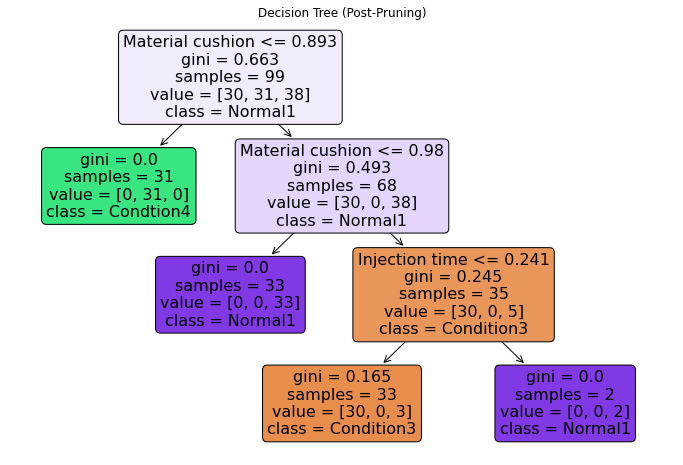

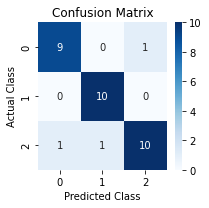

In [11]:
#post pruning - cost complexity pruning
X = data.drop(['Condition'], axis = 1)
Y = data['Condition']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
accuracy_3 =[]
u = 1
for tr_i, te_i in cv.split(X, Y):
    x_tr = X.iloc[tr_i]
    x_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]
    
    clf = dt(random_state=0)

    print('\n Iteration No.',u)
    print("Training data length:", len(y_tr))
    print("Verification data length:", len(y_v))
    u = u + 1
    
    #path returns ccp_alphas and impurities at each step of the pruning
    path=clf.cost_complexity_pruning_path(x_tr,y_tr)
    ccp_alphas = path.ccp_alphas
    impurities = path.impurities
    print("ccp alpha wil give list of values :",ccp_alphas,"\n")
    print("Impurities in Decision Tree :",impurities,"\n")
    
    #clfs is for storing all modes here 
    #checking 3 nodes at a time for 1 decision tree
    clfs=[]   
    for ccp_alpha in ccp_alphas:
        clf=dt(random_state=0,ccp_alpha=ccp_alpha)
        clf.fit(x_tr,y_tr)
        clfs.append(clf)

        print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

    #plotting the graph to see accuracy against alphas for testing and training
    train_scores = [clf.score(x_tr, y_tr) for clf in clfs]
    test_scores = [clf.score(x_v, y_v) for clf in clfs]
    fig, ax = plt.subplots()
    ax.set_xlabel("Alpha")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy vs Alpha for Training and Testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
    ax.legend()
    plt.show()

    #finding the best ccp_alpha with GridSearchCV
    ccp_alpha_grid_search = GridSearchCV(estimator=dt(random_state=0), cv=4, scoring=make_scorer(acs), param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),)
    ccp_alpha_grid_search.fit(x_tr,y_tr)
    ccp_alpha_grid_search.best_params_
    best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_
    
    #fit post-prune decision tree model and predict newy_p2
    newy_p2 = best_ccp_alpha_tree.predict(x_v)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,newy_p2)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)

    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Condition3:',
                1:'Machine Quality Accuracy for Condition4:',
                2:'Machine Quality Accuracy for Normal1:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])

    #calculate overall accuracy
    accuracy = np.mean(acs(y_v, newy_p2))
    print("Overall Accuracy of Post-Pruned Tree:", accuracy.round(2),"\n")
    accuracy_3.append(accuracy)

    print("Decision Tree Prediction Classification report", "\n", classification_report(y_v,newy_p2))

    #plot and save post-prune decision tree
    plt.figure(figsize=(12,8))
    tree.plot_tree(best_ccp_alpha_tree, feature_names=X.columns,  class_names=YClass, filled=True, rounded=True)
    plt.title('Decision Tree (Post-Pruning)')
    #plt.savefig(post4 + '/' + 'injection_moulding_' + str(len(accuracy_3)) + 'decision_tree.png')

    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))

    #use heatmap
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class',ylabel='Actual Class')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    #plt.savefig(post4 + '/' + 'injection_moulding' + str(len(accuracy_3)) + 'confusion matrix.png')
    plt.show()
    

    #reset the label to original and save the original test data +prediction into a .csv file 
    x_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)

    result_matrix = pd.concat([x_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = newy_p2
    #result_matrix.to_csv(post4 + '/' + 'cv_' + str(len(accuracy_3)) + '.csv', index=False)